## Library

In [ ]:
!pip install PyWavelets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 14.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.preprocessing import MinMaxScaler
from scipy.signal import butter, filtfilt, morlet, cwt, find_peaks
import pywt

##Load Data

In [ ]:
# Daftar path file EMG
file_paths = [
"Standing.txt",
"Walking.txt",
"Waving.txt",
"Bowing.txt",
"Clapping.txt",
"Handshaking.txt",
"Hugging.txt",
"Jumping.txt",
"Running.txt",
"Seating.txt",
"Pushing.txt",
"Sidekicking.txt",
"Slapping.txt",
"Elbowing.txt",
"Frontkicking.txt",
"Hamering.txt",
"Headering.txt",
"Kneeing.txt",
"Pulling.txt",
"Punching.txt"
]

# Fungsi untuk membaca file
def load_emg_data(file_path):
    try:
        data = pd.read_csv(file_path, delim_whitespace=True, header=None)
        return data
    except Exception as e:
        print(f"Error loading {file_path}: {e}")
        return None

# Membaca semua file
emg_data_dict = {os.path.basename(path).replace(".txt", ""): load_emg_data(path) for path in file_paths}

<ipython-input-4-39f49139e74d>:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)
<ipython-input-4-39f49139e74d>:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)
<ipython-input-4-39f49139e74d>:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)
<ipython-input-4-39f49139e74d>:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)
<ipython-input-4-39f

## EDA untuk Sub 1 Normal dan Agresif


Activity: Standing
                 0            1            2            3            4  \
count  9725.000000  9725.000000  9725.000000  9725.000000  9725.000000   
mean     -8.997841     3.591774    -6.126375   -13.552185    23.345398   
std      13.727227    16.995557    15.905591    16.090188    20.712317   
min     -61.000000   -80.000000   -78.000000  -102.000000   -66.000000   
25%     -18.000000    -8.000000   -16.000000   -24.000000     9.000000   
50%      -9.000000     4.000000    -6.000000   -14.000000    23.000000   
75%       0.000000    15.000000     4.000000    -3.000000    37.000000   
max      50.000000    71.000000    77.000000    63.000000   106.000000   

                 5            6            7  
count  9725.000000  9725.000000  9725.000000  
mean     24.139537    23.519897    17.348380  
std      15.438449    19.161553    23.564151  
min     -53.000000   -74.000000  -197.000000  
25%      14.000000    10.000000     7.000000  
50%      24.000000    24.000000

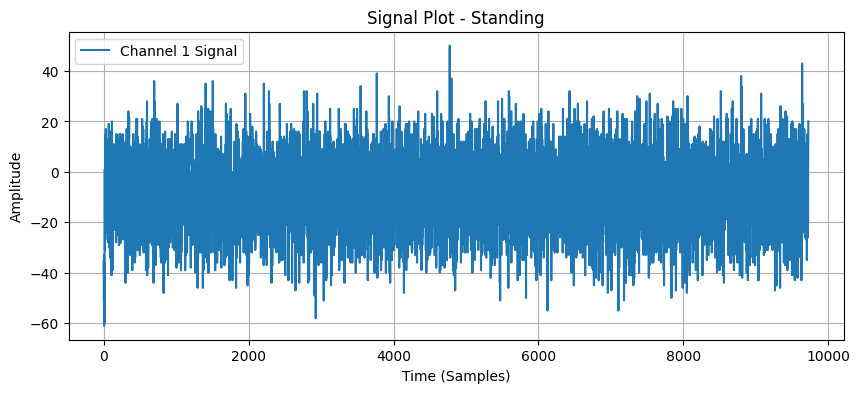


Activity: Walking
                  0             1             2             3             4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -9.007500      3.581200     -6.184000    -13.661400     79.651600   
std       33.316858     36.050511     60.350995     46.200721   2750.402919   
min     -266.000000   -417.000000   -971.000000  -1024.000000  -4000.000000   
25%      -23.000000    -14.000000    -25.000000    -33.000000  -2056.000000   
50%      -10.000000      4.000000     -7.000000    -11.000000    -84.000000   
75%        5.000000     22.000000     10.000000      8.000000   2557.000000   
max      269.000000    638.000000   1119.000000    669.000000   4000.000000   

                  5             6             7  
count  10000.000000  10000.000000  10000.000000  
mean      11.003100    -43.733800     20.042200  
std     1135.830353   2509.764678   1020.883975  
min    -4000.000000  -4000.000000  -4000.000000  
25%     -391.000000

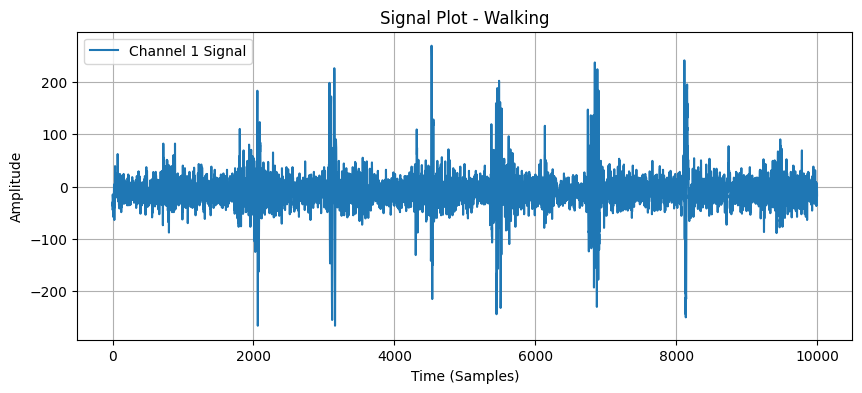


Activity: Waving
                 0            1             2             3             4  \
count  10000.00000  10000.00000  10000.000000  10000.000000  10000.000000   
mean      -9.31640      3.53160     -6.235000    -13.650300     23.234000   
std      262.94667     42.01462     15.177905     15.505265     21.635426   
min    -1231.00000   -310.00000    -75.000000    -74.000000    -69.000000   
25%     -136.00000    -20.00000    -16.250000    -24.000000      9.000000   
50%      -32.00000      5.00000     -6.000000    -14.000000     23.000000   
75%       86.00000     30.00000      4.000000     -3.000000     37.000000   
max     2150.00000    311.00000     55.000000     48.000000    119.000000   

                  5             6             7  
count  10000.000000  10000.000000  10000.000000  
mean      24.178000     23.514300     17.233300  
std       34.404504     28.672618     35.981453  
min     -615.000000    -97.000000   -122.000000  
25%        8.000000      5.000000     

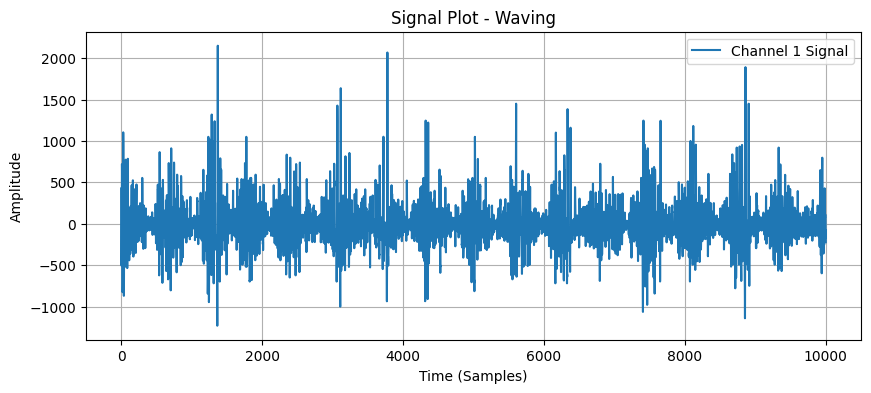


Activity: Bowing
                 0            1            2            3            4  \
count  9830.000000  9830.000000  9830.000000  9830.000000  9830.000000   
mean     -9.137538     3.321770    -6.347101   -13.923499    36.272024   
std      35.616455   132.610232    46.382332   170.962592  1011.291560   
min    -195.000000  -752.000000  -355.000000 -1025.000000 -4000.000000   
25%     -29.000000   -53.000000   -29.000000   -84.000000  -215.750000   
50%     -10.000000     5.000000    -5.000000   -15.000000    26.000000   
75%       9.000000    69.000000    18.000000    56.000000   253.000000   
max     188.000000   672.000000   229.000000  1275.000000  4000.000000   

                 5            6            7  
count  9830.000000  9830.000000  9830.000000  
mean     23.497660    23.125636    17.561343  
std     334.741075   795.026659   275.465659  
min   -2837.000000 -4000.000000 -2104.000000  
25%     -92.000000  -162.500000   -84.000000  
50%      31.000000    25.000000  

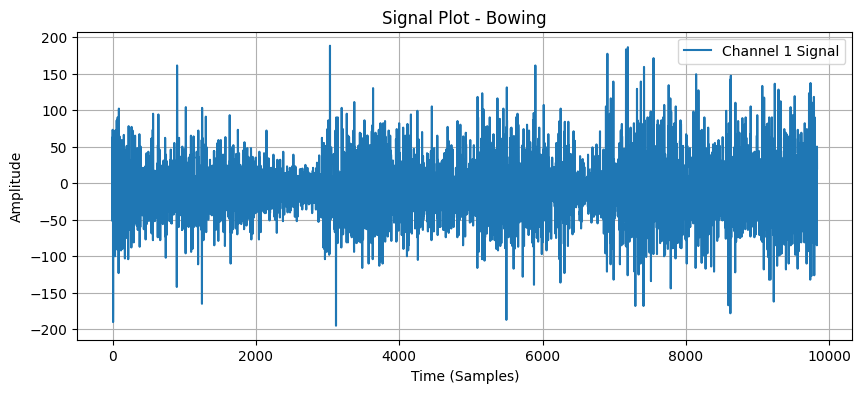


Activity: Clapping
                  0             1             2             3             4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -9.355300      3.598900     -6.849600    -13.794200     23.236900   
std      247.885808    102.922807    622.061494     50.620354    117.468171   
min    -2303.000000   -700.000000  -4000.000000   -347.000000   -506.000000   
25%      -74.000000    -40.000000   -238.000000    -43.000000    -38.000000   
50%      -11.000000      1.000000     40.000000    -14.000000     28.000000   
75%       55.000000     38.000000    280.000000     16.000000     91.000000   
max     2549.000000   1193.000000   4000.000000    329.000000    497.000000   

                  5             6             7  
count  10000.000000  10000.000000  10000.000000  
mean      24.101300    -15.446300     16.698000  
std       18.756285   1050.372019    237.899698  
min      -46.000000  -4000.000000  -1383.000000  
25%       12.00000

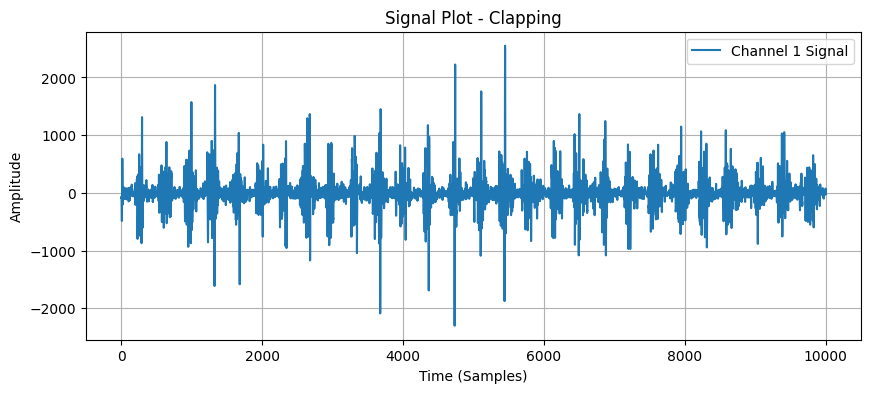


Activity: Handshaking
                 0            1            2            3            4  \
count  9611.000000  9611.000000  9611.000000  9611.000000  9611.000000   
mean     -9.643950     3.502861    -6.261991   -13.681407    23.346686   
std     350.899832    71.880050    15.783744    15.686167    52.580383   
min   -2116.000000  -484.000000   -86.000000   -74.000000  -234.000000   
25%    -162.000000   -30.000000   -17.000000   -24.000000    -9.000000   
50%      -9.000000     1.000000    -6.000000   -14.000000    23.000000   
75%     139.000000    30.000000     4.000000    -3.000000    55.000000   
max    2158.000000   771.000000    77.000000    44.000000   332.000000   

                 5            6            7  
count  9611.000000  9611.000000  9611.000000  
mean     24.111123    23.539278    17.200083  
std     111.015844    60.115158    42.951877  
min   -1070.000000  -969.000000  -468.000000  
25%       2.000000    -9.000000    -7.000000  
50%      37.000000    24.000

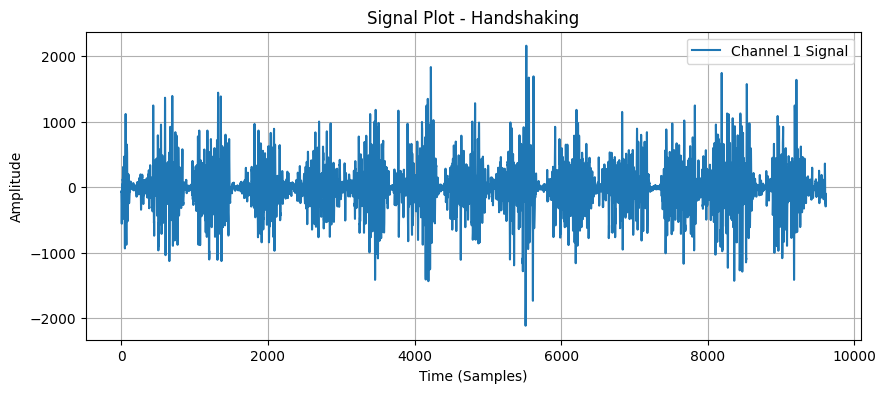


Activity: Hugging
                 0            1            2            3            4  \
count  9756.000000  9756.000000  9756.000000  9756.000000  9756.000000   
mean     -9.189012     3.466585    -6.649651   -13.791513    23.378639   
std     526.726557   104.701830   800.736773    97.138638    31.879433   
min   -2768.000000  -440.000000 -4000.000000  -503.000000  -172.000000   
25%    -284.000000   -59.000000  -438.750000   -71.000000     4.000000   
50%      -5.000000     1.000000   -40.000000   -18.000000    23.000000   
75%     245.000000    67.000000   387.000000    40.000000    43.000000   
max    2678.000000   576.000000  4000.000000   572.000000   209.000000   

                 5            6            7  
count  9756.000000  9756.000000  9756.000000  
mean     24.067548    23.648626    17.377306  
std     183.544024    34.896857   305.141844  
min   -1588.000000  -110.000000 -2193.000000  
25%     -33.000000     1.000000   -75.000000  
50%      53.000000    23.000000 

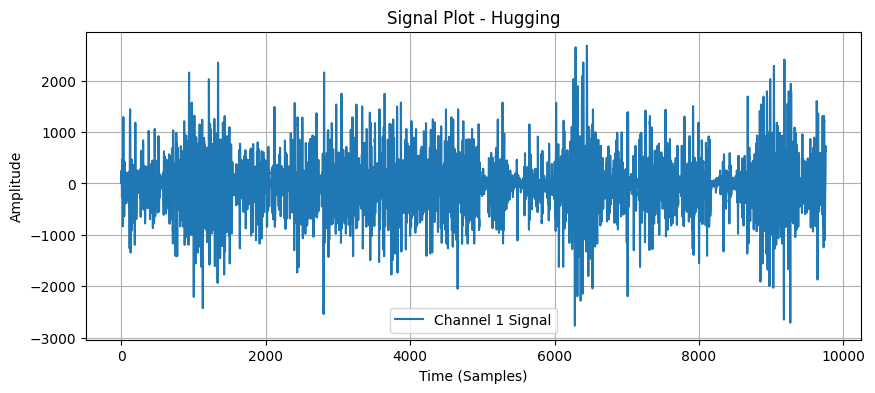


Activity: Jumping
                  0            1             2             3             4  \
count  10000.000000  10000.00000  10000.000000  10000.000000  10000.000000   
mean      -9.284200      5.01560     -6.280700    -13.858600     84.415200   
std      169.614647    642.51612    221.543279    407.174692   3576.261126   
min    -1261.000000  -4000.00000  -1854.000000  -4000.000000  -4000.000000   
25%      -89.000000   -211.00000    -79.000000   -164.000000  -4000.000000   
50%      -16.000000     32.00000    -11.000000     -9.000000    180.000000   
75%       59.000000    273.00000     57.000000    156.500000   4000.000000   
max     1238.000000   4000.00000   2140.000000   2867.000000   4000.000000   

                5             6             7  
count  10000.0000  10000.000000  10000.000000  
mean      13.9100    271.821600    -85.699300  
std     2027.3351   3296.540122   2358.080327  
min    -4000.0000  -4000.000000  -4000.000000  
25%    -1123.0000  -3790.000000  -1519

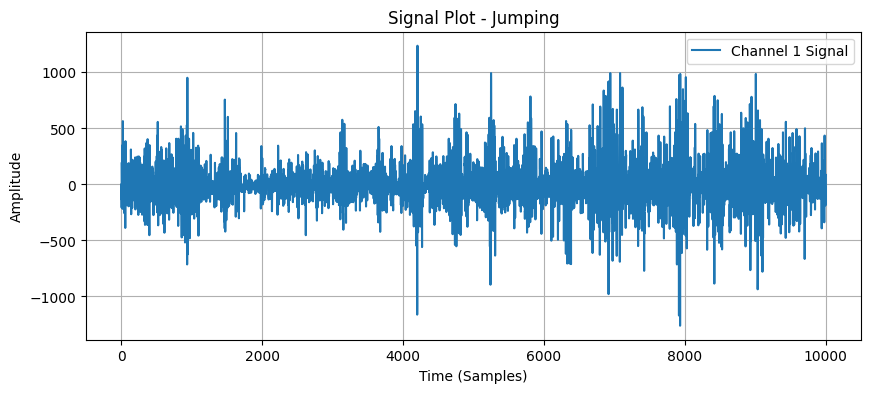


Activity: Running
                 0            1            2            3            4  \
count  9964.000000  9964.000000  9964.000000  9964.000000  9964.000000   
mean     -9.249297     3.258531    -1.258430   -13.145122  -113.487254   
std     622.101721   229.472474  1235.185191   397.873793  3643.944100   
min   -4000.000000 -1808.000000 -4000.000000 -4000.000000 -4000.000000   
25%    -147.000000  -117.000000  -383.000000  -148.000000 -4000.000000   
50%      -9.000000     0.000000    -3.000000    -4.000000  -551.500000   
75%     144.000000   121.250000   445.000000   142.000000  4000.000000   
max    4000.000000  1420.000000  4000.000000  3698.000000  4000.000000   

                 5            6            7  
count  9964.000000  9964.000000  9964.000000  
mean     32.397732   -11.292854    -3.725813  
std    3026.929892  3538.851175  2659.734311  
min   -4000.000000 -4000.000000 -4000.000000  
25%   -3144.000000 -4000.000000 -2051.000000  
50%      88.000000  -107.500000 

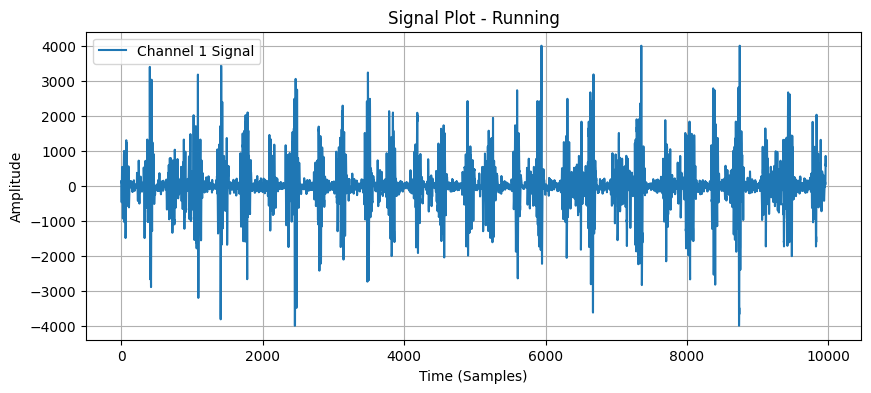


Activity: Seating
                  0             1             2             3             4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -8.961000      3.643500     -6.199300    -13.526500     23.643000   
std       13.927185     16.608757     15.165447     16.168539    127.721717   
min      -77.000000    -64.000000    -66.000000   -114.000000   -918.000000   
25%      -18.000000     -7.000000    -16.000000    -24.000000    -20.000000   
50%       -9.000000      4.000000     -6.000000    -14.000000     37.000000   
75%        0.000000     15.000000      4.000000     -2.000000     90.000000   
max       47.000000     66.000000     48.000000     50.000000    534.000000   

                  5             6             7  
count  10000.000000  10000.000000  10000.000000  
mean      24.229400     23.604300     17.400000  
std       17.225401     17.612897     15.102139  
min      -52.000000    -89.000000    -80.000000  
25%       13.000000

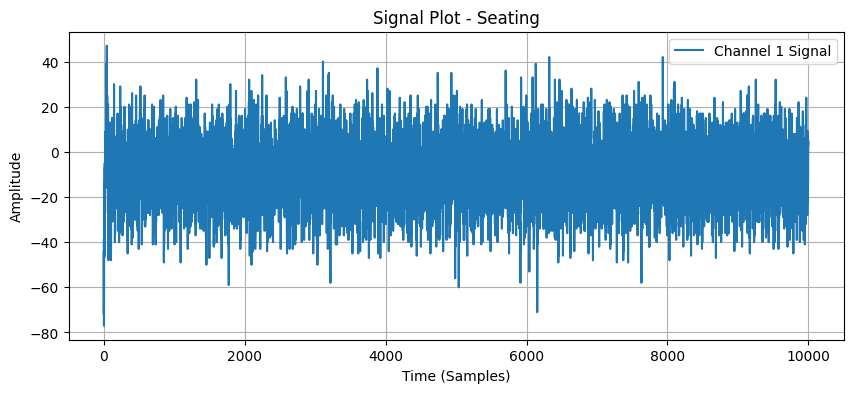


Activity: Pushing
                 0            1            2            3            4  \
count  9676.000000  9676.000000  9676.000000  9676.000000  9676.000000   
mean    -33.887660    27.907916   -31.617404    17.958247     3.240389   
std    1445.734172  1241.255947  1861.469214  1469.504756  2168.198836   
min   -4000.000000 -4000.000000 -4000.000000 -4000.000000 -4000.000000   
25%    -596.000000  -210.250000  -969.000000  -322.250000 -1333.000000   
50%     -25.000000    20.000000   -14.000000    27.000000    36.000000   
75%     530.000000   298.000000   936.000000   374.000000  1352.000000   
max    4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   

                 5            6            7  
count  9676.000000  9676.000000  9676.000000  
mean     54.815730    30.312009    -7.770256  
std    2394.645749  1450.055477  1743.563881  
min   -4000.000000 -4000.000000 -4000.000000  
25%   -1581.000000  -615.000000  -714.000000  
50%      93.500000    68.000000 

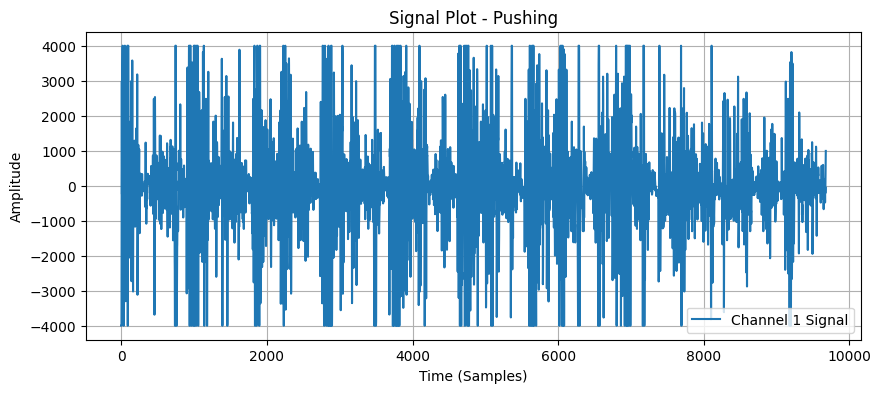


Activity: Sidekicking
                 0            1            2            3            4  \
count  9829.000000  9829.000000  9829.000000  9829.000000  9829.000000   
mean    -11.690406     2.645742    -9.387323    -5.525893    11.281310   
std     661.395874   622.193971  1201.527244   885.842081  3274.640884   
min   -4000.000000 -4000.000000 -4000.000000 -4000.000000 -4000.000000   
25%    -166.000000  -179.000000  -389.000000  -241.000000 -4000.000000   
50%     -16.000000    22.000000   -34.000000    29.000000     3.000000   
75%     139.000000   211.000000   337.000000   320.000000  4000.000000   
max    4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   

                 5            6            7  
count  9829.000000  9829.000000  9829.000000  
mean     71.415098    72.750839    -7.078645  
std    3137.848950  3164.930574  3132.434366  
min   -4000.000000 -4000.000000 -4000.000000  
25%   -3835.000000 -3753.000000 -3805.000000  
50%     150.000000    75.000

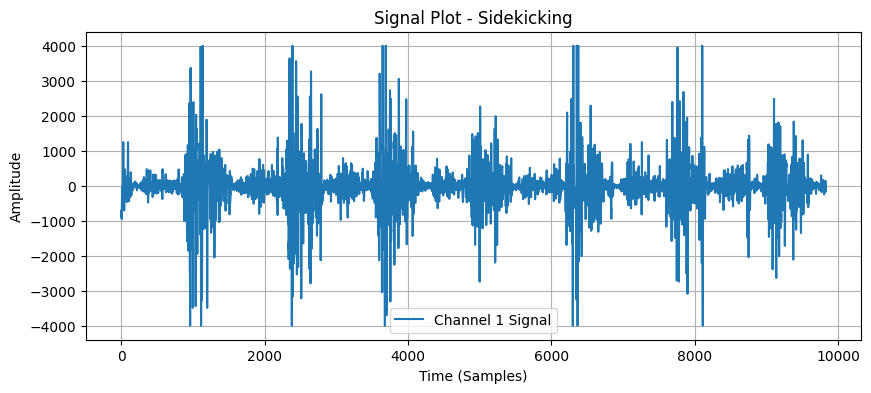


Activity: Slapping
                 0            1            2            3            4  \
count  9788.000000  9788.000000  9788.000000  9788.000000  9788.000000   
mean    -43.310380    10.414487    -6.237638   -13.499694    10.422252   
std    1412.289221   867.001689   275.188503   466.235834  2721.483335   
min   -4000.000000 -4000.000000 -4000.000000 -4000.000000 -4000.000000   
25%    -368.000000  -153.000000   -81.000000  -139.250000 -2377.500000   
50%     -27.000000     4.000000   -12.000000    -7.000000   141.500000   
75%     226.000000   154.000000    63.000000   142.000000  2243.000000   
max    4000.000000  4000.000000  3054.000000  4000.000000  4000.000000   

                 5            6            7  
count  9788.000000  9788.000000  9788.000000  
mean      3.811095    54.191561    16.118104  
std    1096.969050  2195.955096  1006.101622  
min   -4000.000000 -4000.000000 -4000.000000  
25%    -310.000000 -1382.000000  -325.000000  
50%      55.000000   123.000000

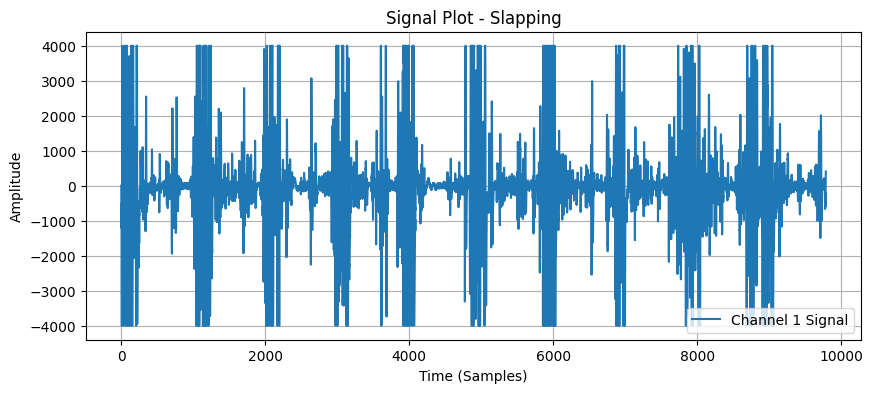


Activity: Elbowing
                 0            1            2            3            4  \
count  9772.000000  9772.000000  9772.000000  9772.000000  9772.000000   
mean     22.069894     6.866558    90.645518   -21.324192   -39.708964   
std    1641.934702   926.624348  2469.559323  1465.077365  3203.126226   
min   -4000.000000 -4000.000000 -4000.000000 -4000.000000 -4000.000000   
25%    -766.000000  -244.000000 -1671.000000  -458.000000 -3920.500000   
50%      62.000000     4.000000   223.000000   -17.500000  -144.000000   
75%     855.000000   264.000000  1835.000000   434.000000  3982.750000   
max    4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   

                 5            6            7  
count  9772.000000  9772.000000  9772.000000  
mean     22.227896   -39.698936   -17.514224  
std    2120.056960  3227.896227  2360.119386  
min   -4000.000000 -4000.000000 -4000.000000  
25%   -1095.000000 -4000.000000 -1558.000000  
50%       9.000000    24.000000

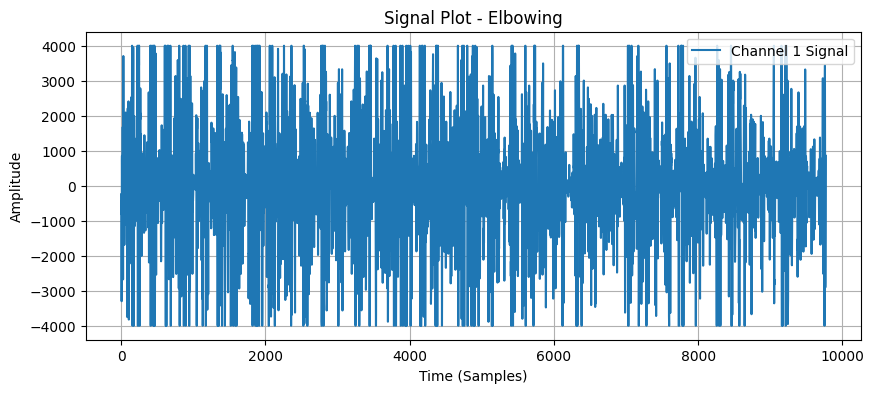


Activity: Frontkicking
                 0            1            2            3            4  \
count  9811.000000  9811.000000  9811.000000  9811.000000  9811.000000   
mean    -10.154215     5.748344   -11.458771    -5.140964   -50.283661   
std     500.790315   544.402395  1245.353001   921.390345  3474.902073   
min   -4000.000000 -4000.000000 -4000.000000 -4000.000000 -4000.000000   
25%    -178.000000  -201.000000  -418.000000  -263.000000 -4000.000000   
50%     -23.000000    26.000000   -38.000000    28.000000  -153.000000   
75%     129.000000   241.000000   368.000000   337.000000  4000.000000   
max    4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   

                 5            6            7  
count  9811.000000  9811.000000  9811.000000  
mean    180.791153   -35.155030     9.491795  
std    3174.499670  3442.327335  3049.969119  
min   -4000.000000 -4000.000000 -4000.000000  
25%   -3775.000000 -4000.000000 -3200.000000  
50%     307.000000  -109.00

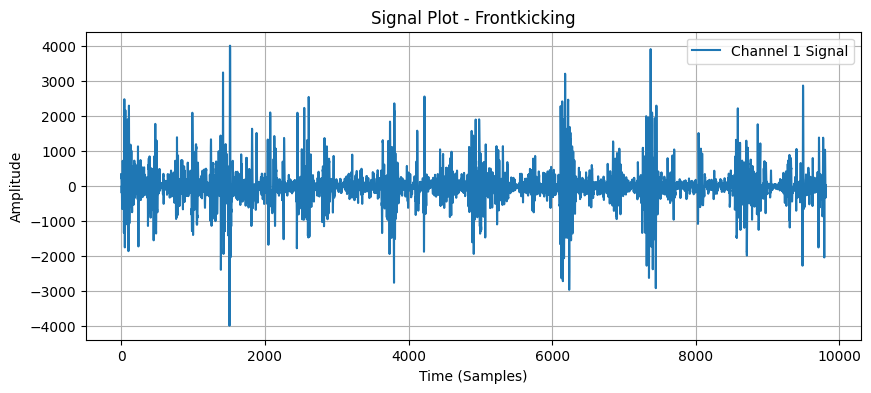


Activity: Hamering
                  0             1             2             3             4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     -48.741500     18.977600     -2.454400     32.118900    -11.357400   
std     1855.756906   1593.340489   2360.666557   1932.427615   2831.443549   
min    -4000.000000  -4000.000000  -4000.000000  -4000.000000  -4000.000000   
25%     -879.000000   -480.000000  -1407.000000   -591.000000  -2616.000000   
50%      -52.500000     -1.000000     39.500000     30.000000     14.000000   
75%      721.000000    538.000000   1436.000000    756.000000   2492.000000   
max     4000.000000   4000.000000   4000.000000   4000.000000   4000.000000   

                  5             6             7  
count  10000.000000  10000.000000  10000.000000  
mean     129.636300     71.890900      3.817400  
std     2287.857674   2237.617945   1309.417322  
min    -4000.000000  -4000.000000  -4000.000000  
25%    -1196.00000

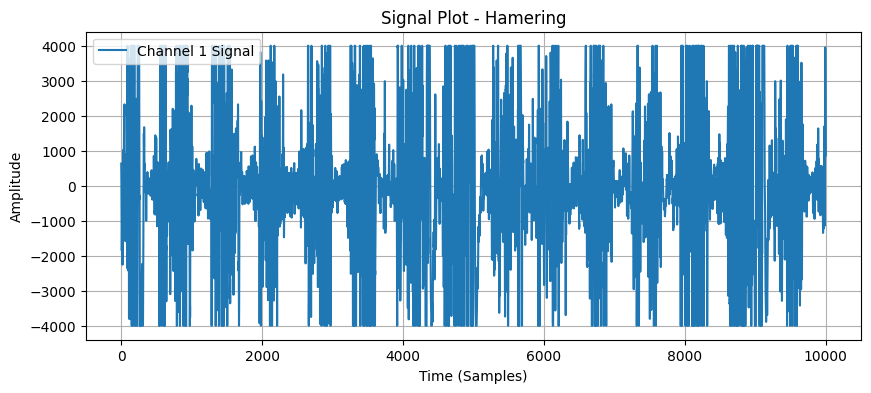


Activity: Headering
                  0             1             2             3             4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      -9.348400      3.382800     -6.509500    -14.433900    -22.483900   
std      164.300687    215.159011    283.426062    302.293775   2147.484984   
min     -848.000000  -3867.000000  -2210.000000  -3689.000000  -4000.000000   
25%      -75.000000    -39.000000   -101.000000    -84.000000  -1290.000000   
50%      -10.000000      4.000000     -7.000000     -9.000000     31.000000   
75%       55.000000     53.000000     85.000000     63.000000   1279.000000   
max      973.000000   3340.000000   1900.000000   4000.000000   4000.000000   

                  5             6             7  
count  10000.000000  10000.000000  10000.000000  
mean      21.856400     -7.942300     33.477600  
std      888.465175   1976.434766   1139.358359  
min    -4000.000000  -4000.000000  -4000.000000  
25%     -176.2500

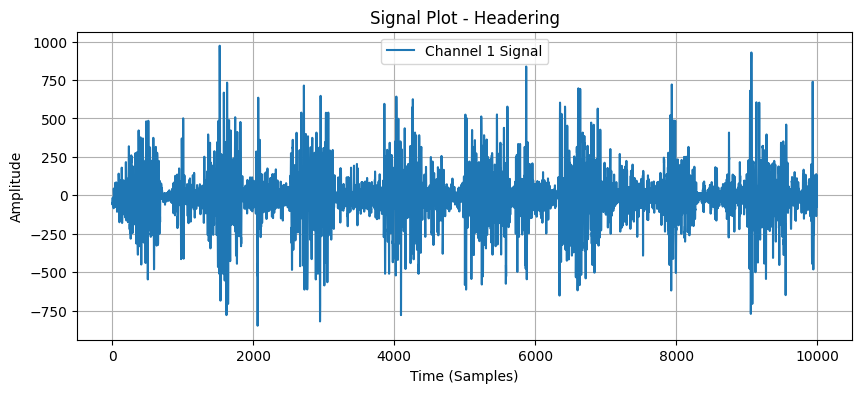


Activity: Kneeing
                  0             1             2             3             4  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean     -10.287600      4.377800     -9.008100     -5.148900    -13.078600   
std      833.472249    655.012021    981.346881    884.285656   3448.684416   
min    -4000.000000  -4000.000000  -4000.000000  -4000.000000  -4000.000000   
25%     -216.000000   -207.000000   -290.000000   -262.000000  -4000.000000   
50%      -13.000000     18.000000    -25.000000     33.500000    -45.500000   
75%      199.000000    254.000000    258.000000    341.000000   4000.000000   
max     4000.000000   4000.000000   4000.000000   4000.000000   4000.000000   

                  5             6             7  
count  10000.000000  10000.000000  10000.000000  
mean      52.977000     93.893300     13.051500  
std     3255.701613   3394.102188   3191.397279  
min    -4000.000000  -4000.000000  -4000.000000  
25%    -4000.000000

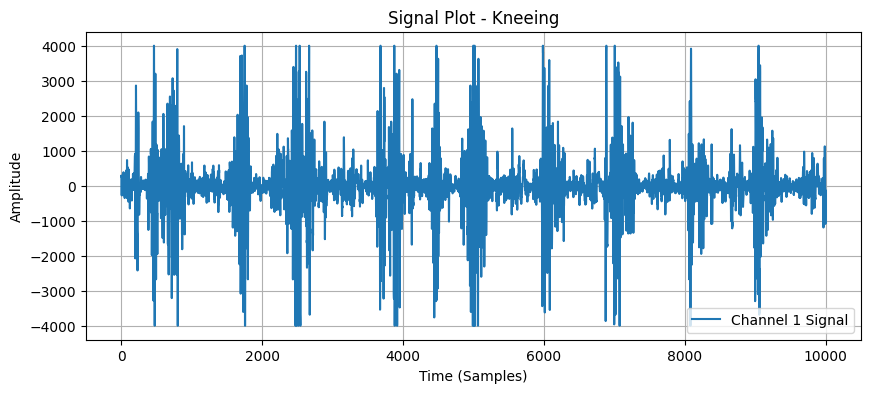


Activity: Pulling
                 0            1            2            3            4  \
count  9659.000000  9659.000000  9659.000000  9659.000000  9659.000000   
mean   -158.939435     3.918832   -75.668910    -5.886117     4.274045   
std    2353.510084   815.734402  2510.028752  1044.415011  2281.269106   
min   -4000.000000 -4000.000000 -4000.000000 -4000.000000 -4000.000000   
25%   -1407.000000  -310.000000 -1725.000000  -493.000000 -1404.000000   
50%     -68.000000     2.000000   -46.000000     4.000000    15.000000   
75%     838.000000   325.000000  1410.000000   496.000000  1401.000000   
max    4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   

                 5            6            7  
count  9659.000000  9659.000000  9659.000000  
mean      8.744798    63.983021    -6.499327  
std    2416.940201  1975.040612  2481.365719  
min   -4000.000000 -4000.000000 -4000.000000  
25%   -1591.000000  -809.000000 -1664.000000  
50%     102.000000    29.000000 

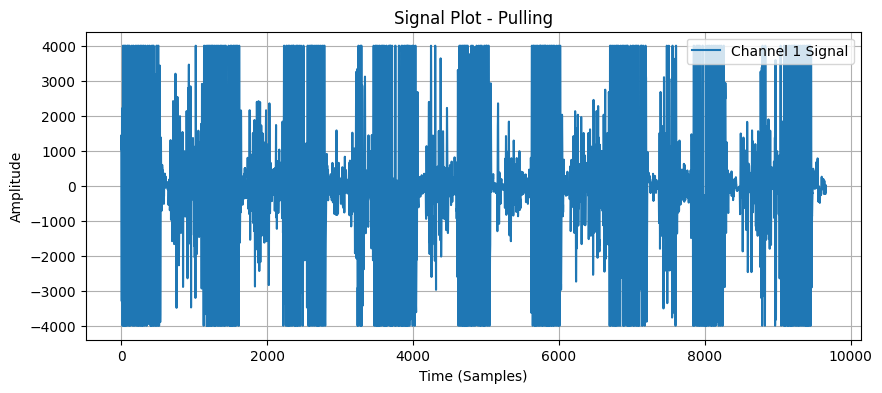


Activity: Punching
                 0            1            2            3            4  \
count  9637.000000  9637.000000  9637.000000  9637.000000  9637.000000   
mean    -22.422538     6.682681    -0.331120    12.203383    49.806060   
std    1585.936628  1071.284637  2005.313834  1579.193445  2886.207892   
min   -4000.000000 -4000.000000 -4000.000000 -4000.000000 -4000.000000   
25%    -653.000000  -240.000000 -1015.000000  -376.000000 -2578.000000   
50%     -15.000000    -2.000000   -22.000000   -13.000000    97.000000   
75%     629.000000   253.000000  1053.000000   369.000000  2710.000000   
max    4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   

                 5            6            7  
count  9637.000000  9637.000000  9637.000000  
mean     29.094739     4.924665    19.616478  
std    1738.331585  2156.162459  1161.580313  
min   -4000.000000 -4000.000000 -4000.000000  
25%    -695.000000 -1382.000000  -415.000000  
50%      64.000000   -41.000000

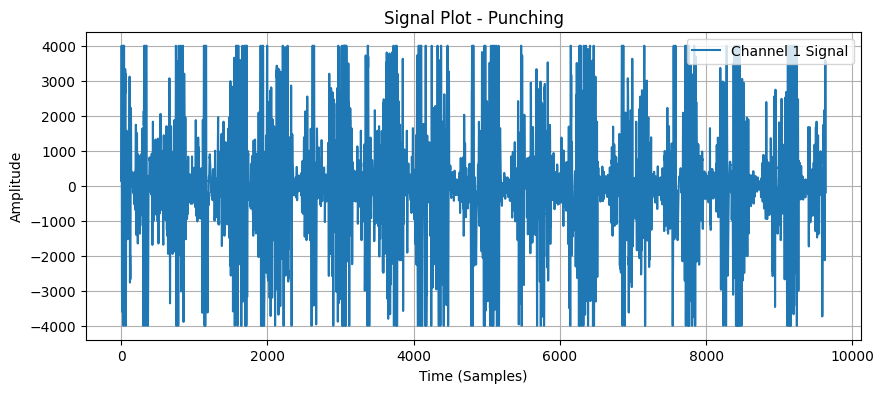

In [ ]:
# EDA: Menampilkan informasi dasar
for activity, data in emg_data_dict.items():
    if data is not None:
        print(f"\nActivity: {activity}")
        print(data.describe())  # Statistik deskriptif
        print(f"Shape: {data.shape}")  # Dimensi dataset

        # Visualisasi sinyal (contoh kolom pertama saja)
        plt.figure(figsize=(10, 4))
        plt.plot(data[0], label="Channel 1 Signal")
        plt.title(f"Signal Plot - {activity}")
        plt.xlabel("Time (Samples)")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.grid()
        plt.show()

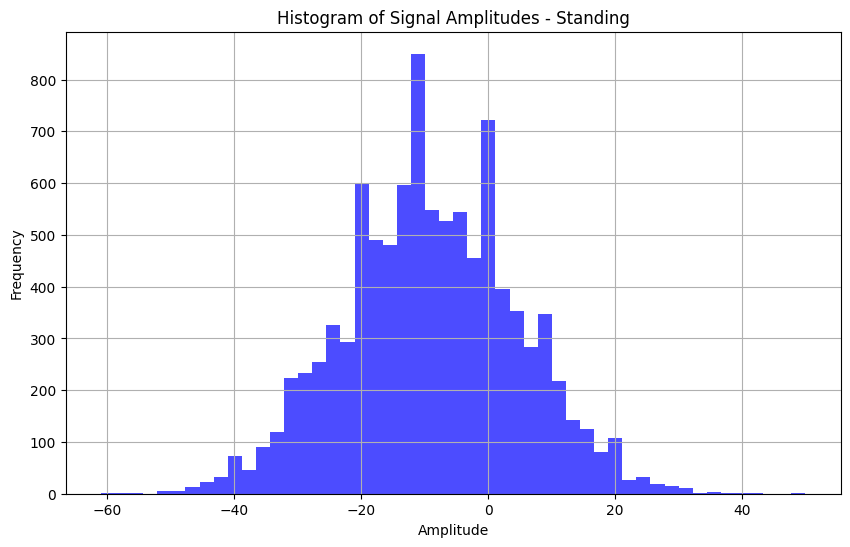

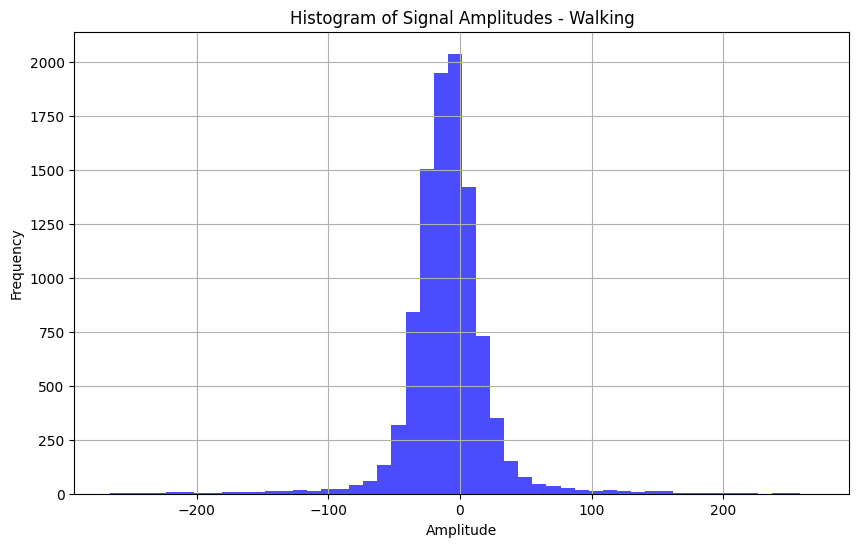

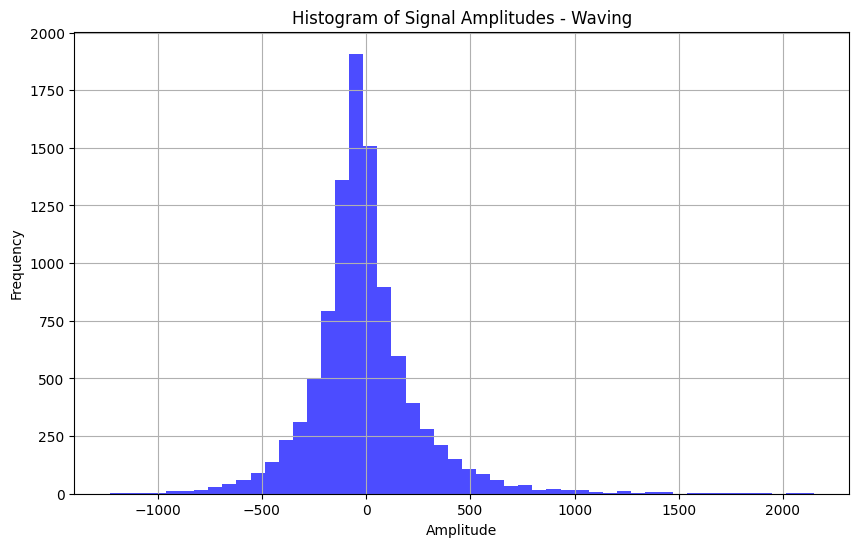

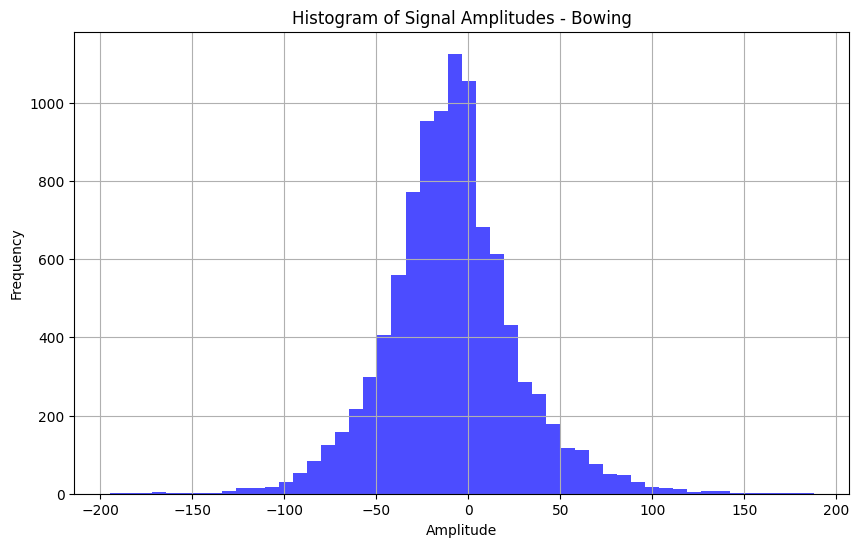

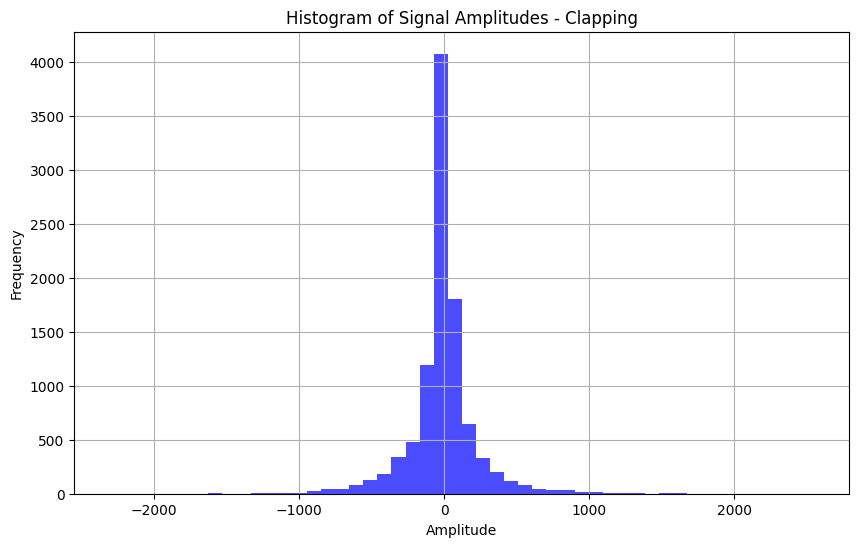

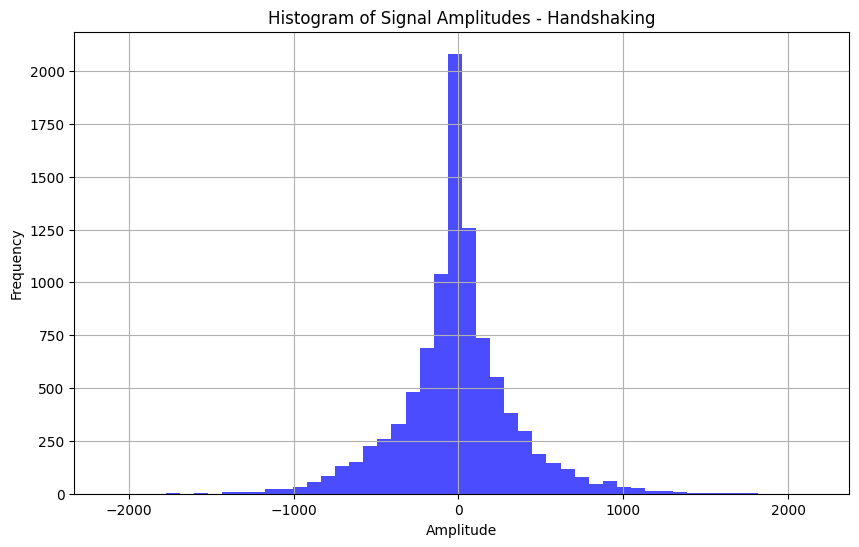

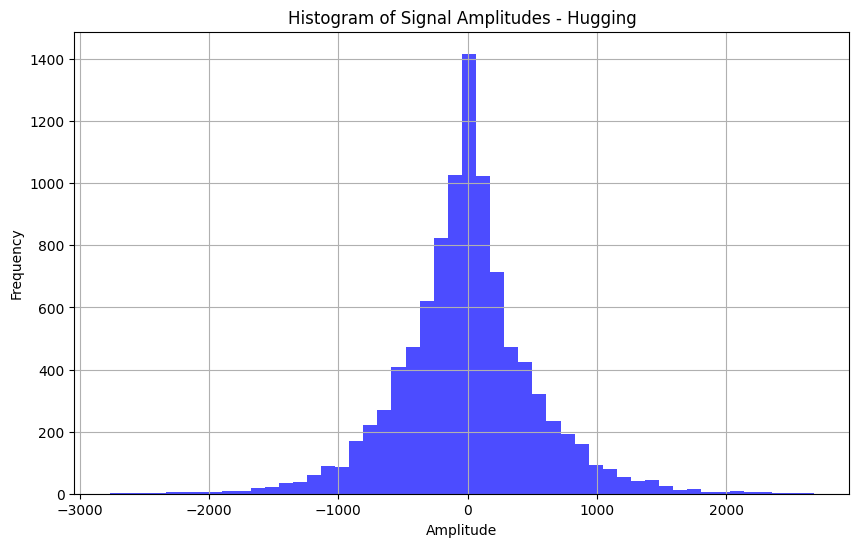

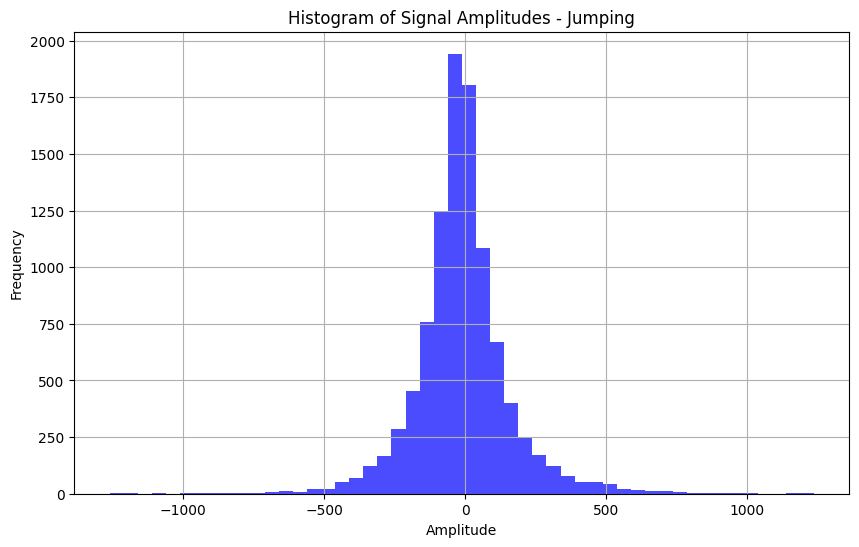

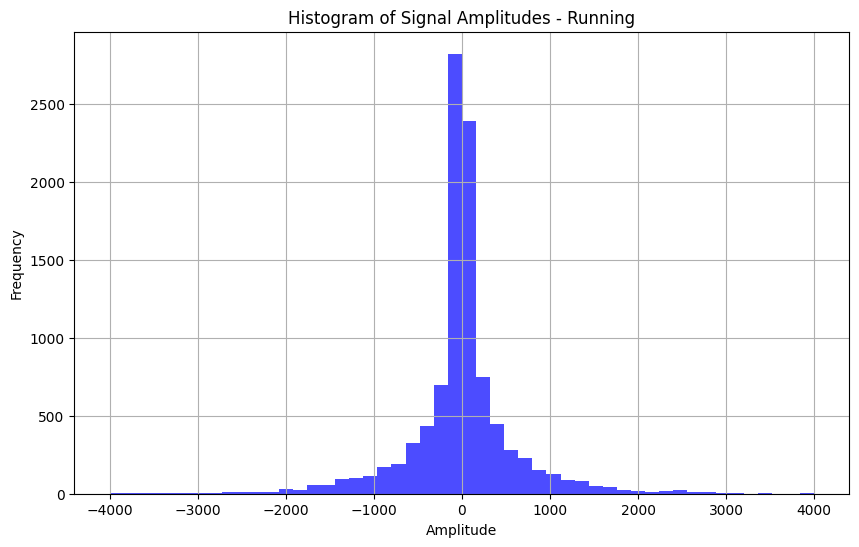

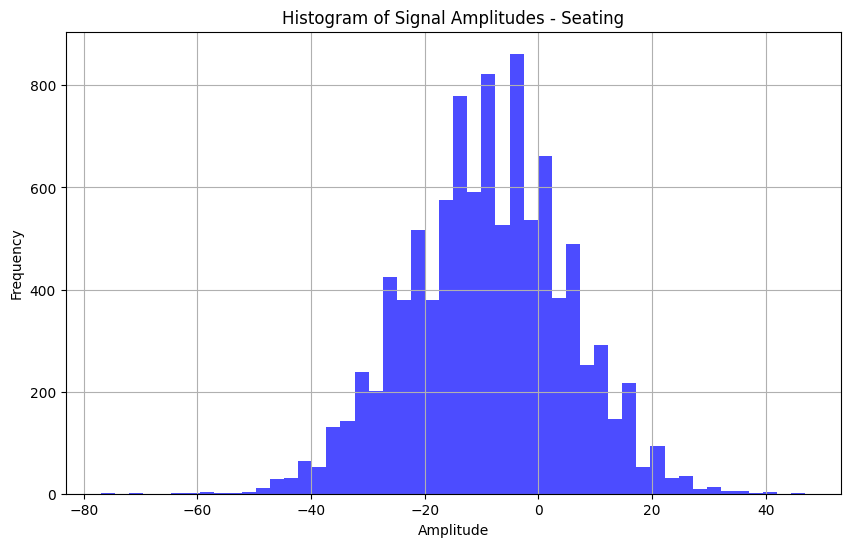

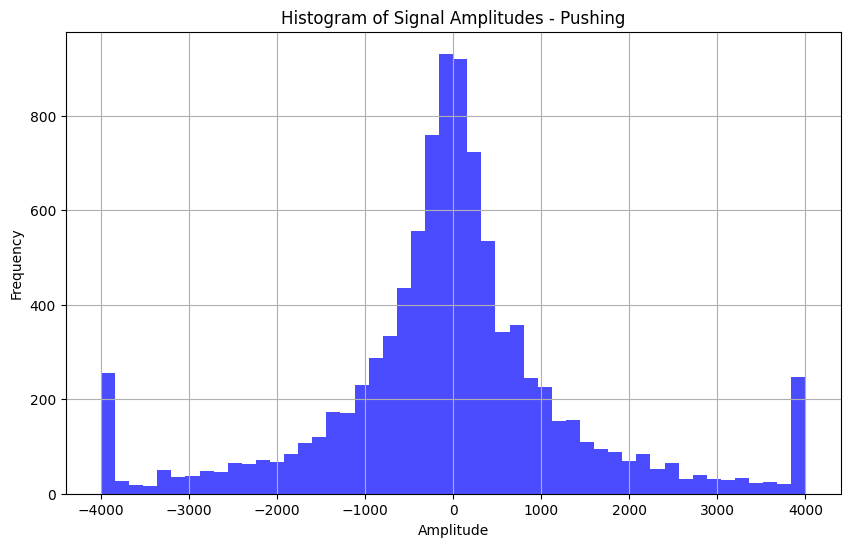

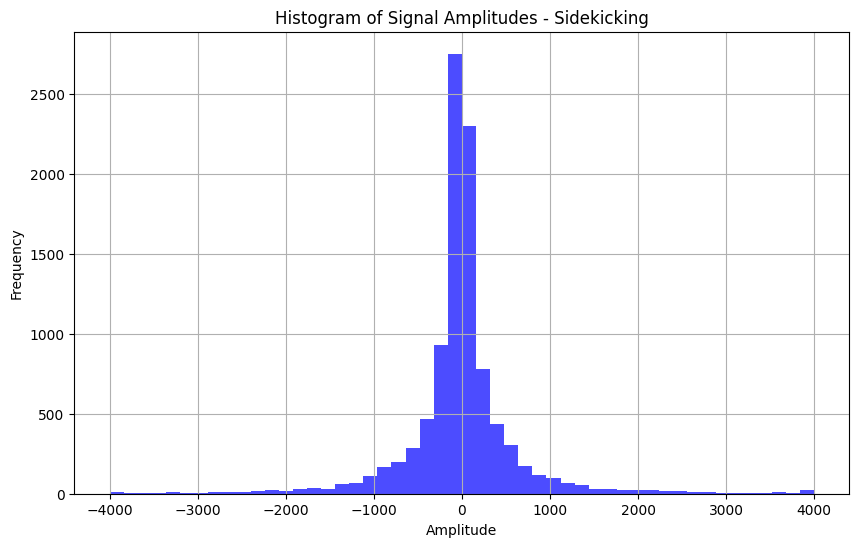

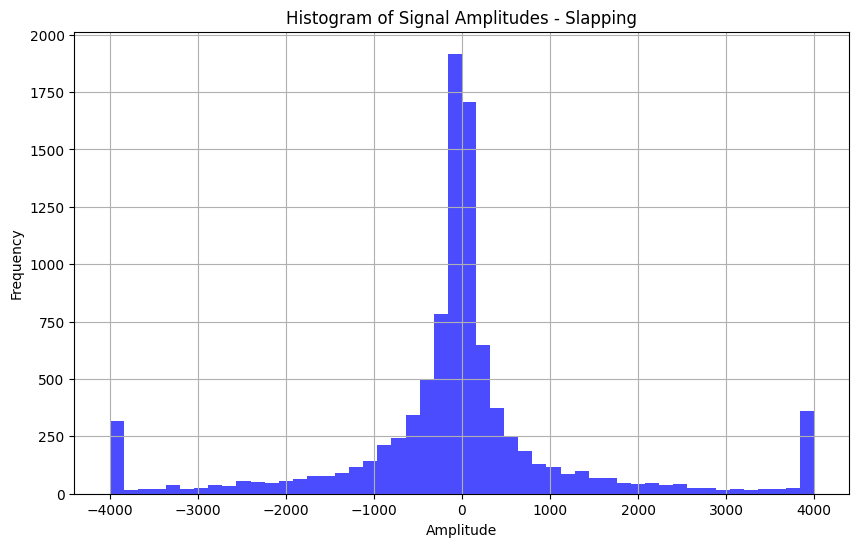

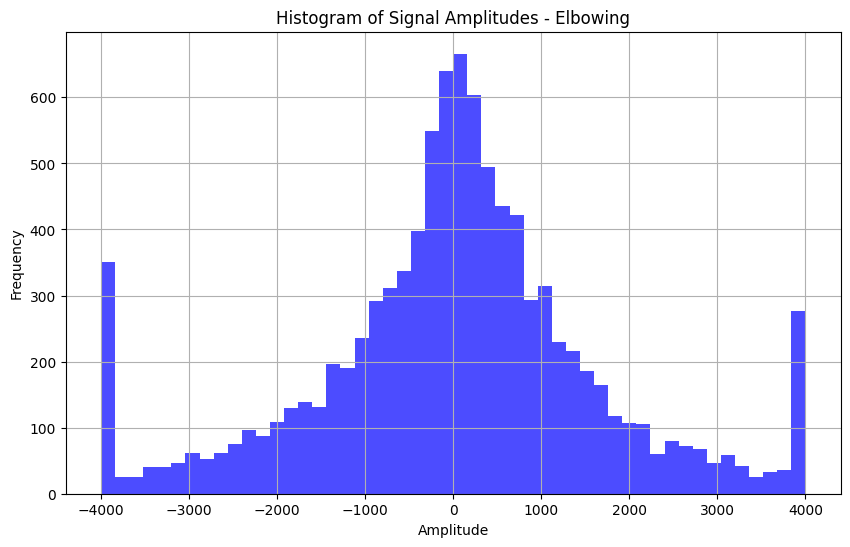

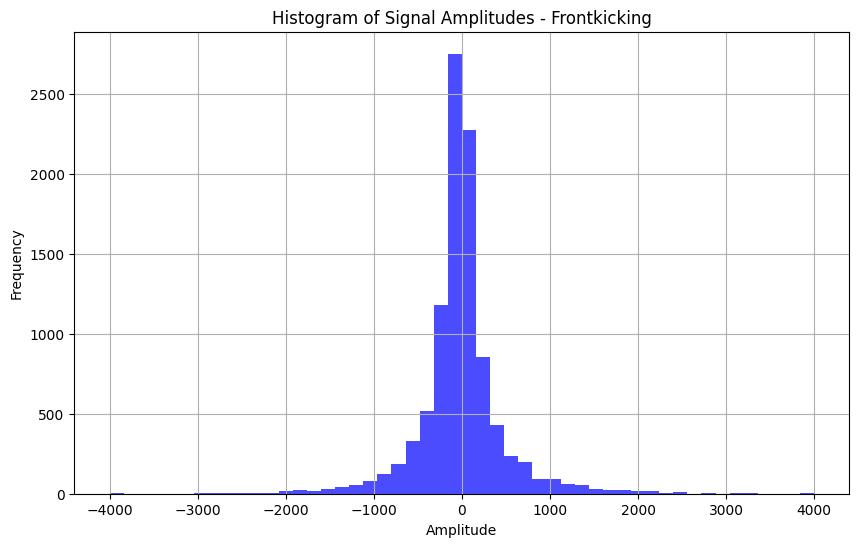

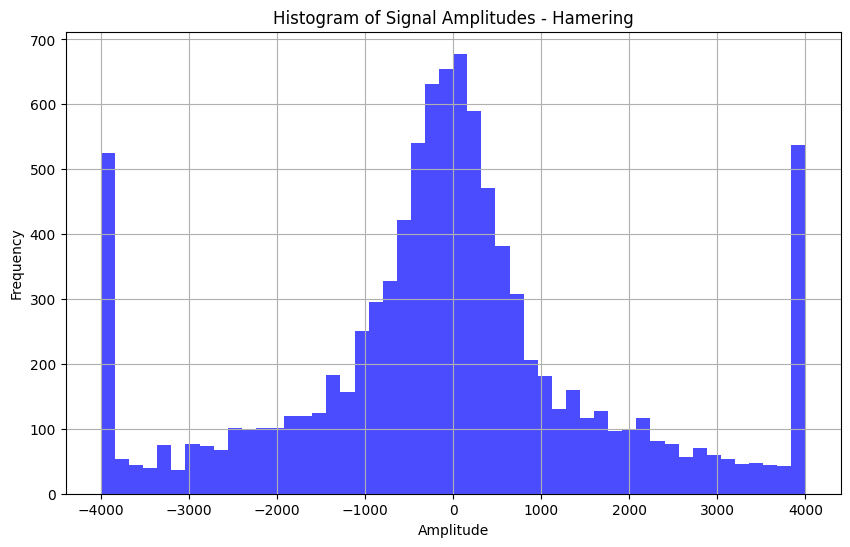

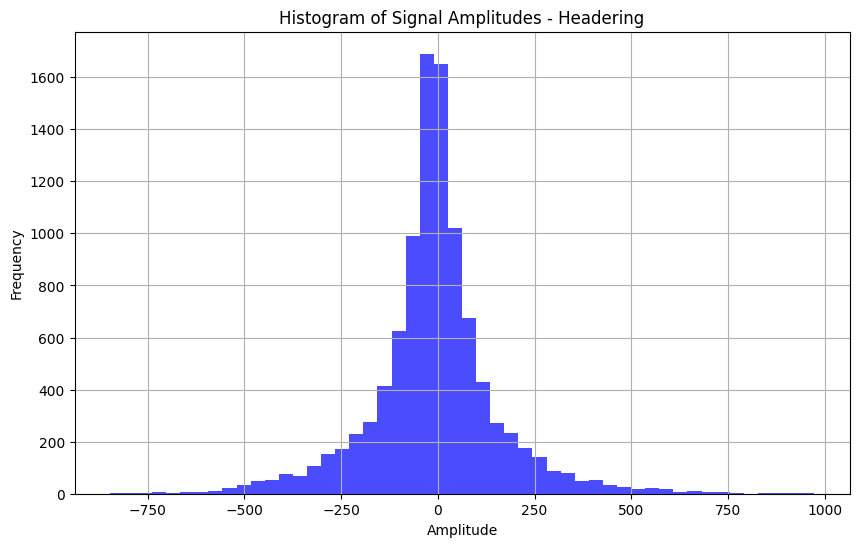

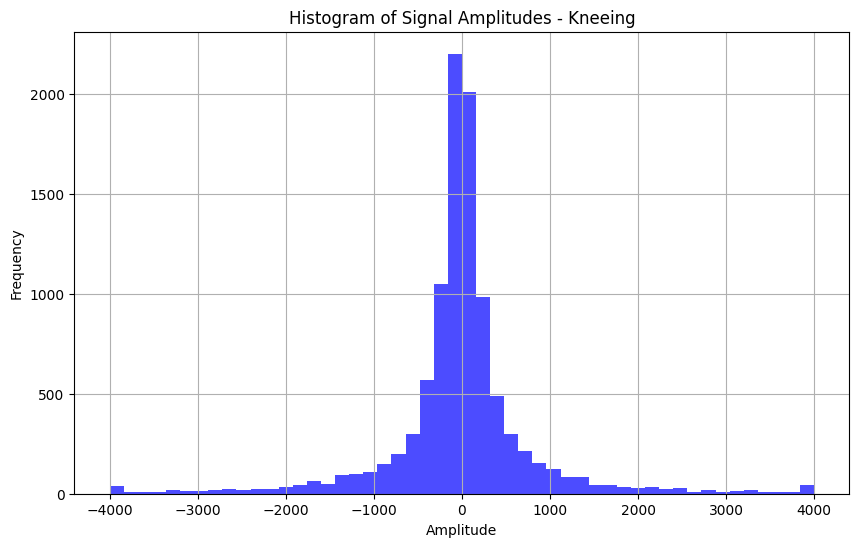

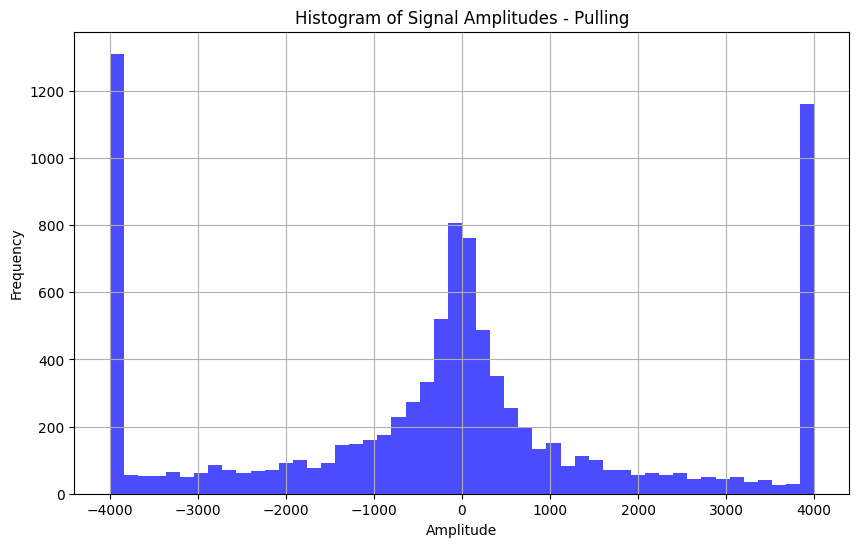

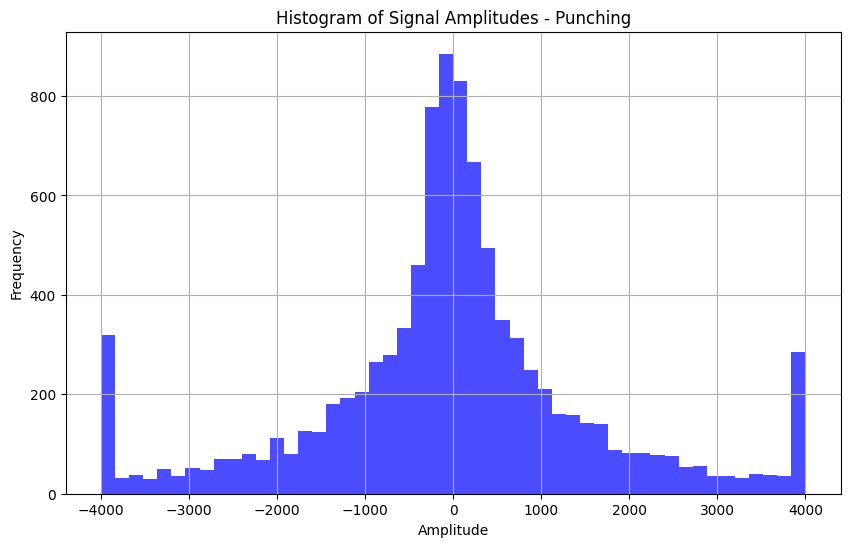

In [ ]:
# Visualisasi data dan histogram
for activity, data in emg_data_dict.items():
    if data is not None:

        # Visualisasi histogram amplitudo Channel 1
        plt.figure(figsize=(10, 6))
        plt.hist(data[0], bins=50, color='blue', alpha=0.7)
        plt.title(f"Histogram of Signal Amplitudes - {activity}")
        plt.xlabel("Amplitude")
        plt.ylabel("Frequency")
        plt.grid()
        plt.show()

## Pre Processing


Processing Activity: Standing
Preprocessed data for Standing stored.


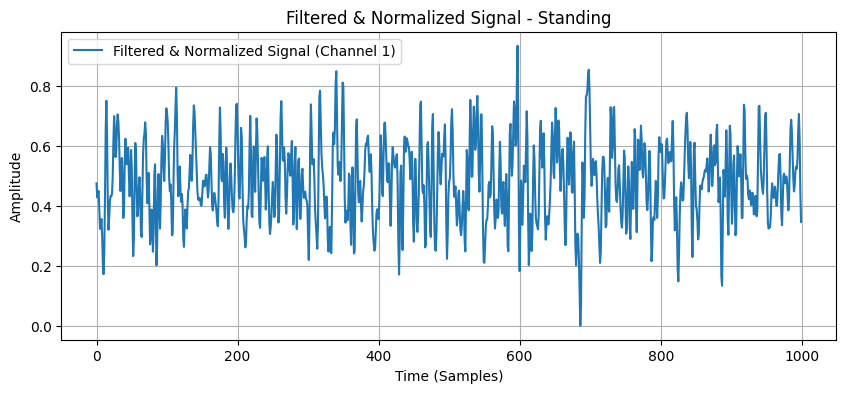


Processing Activity: Walking
Preprocessed data for Walking stored.


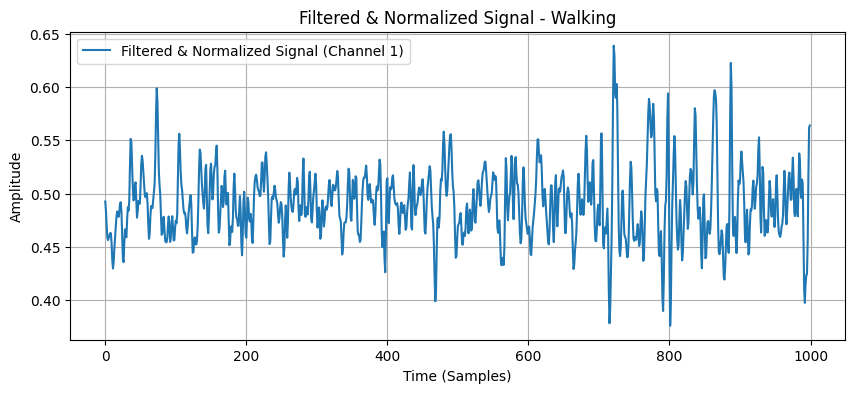


Processing Activity: Waving
Preprocessed data for Waving stored.


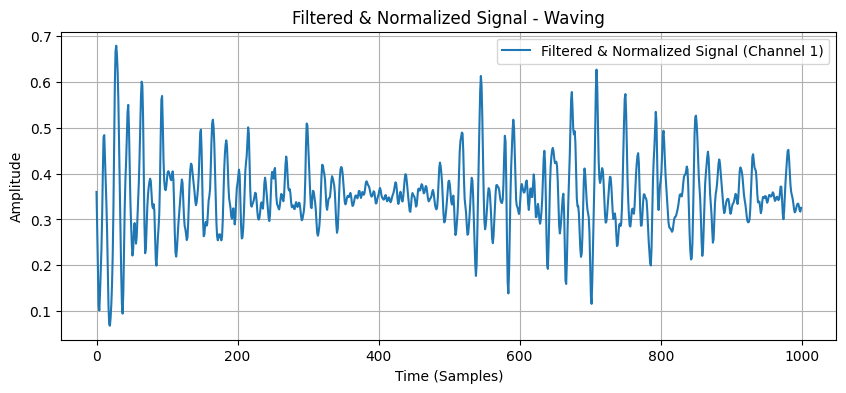


Processing Activity: Bowing
Preprocessed data for Bowing stored.


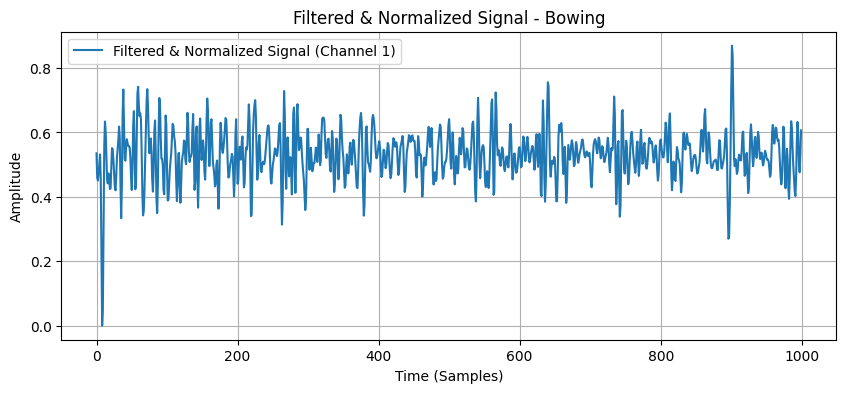


Processing Activity: Clapping
Preprocessed data for Clapping stored.


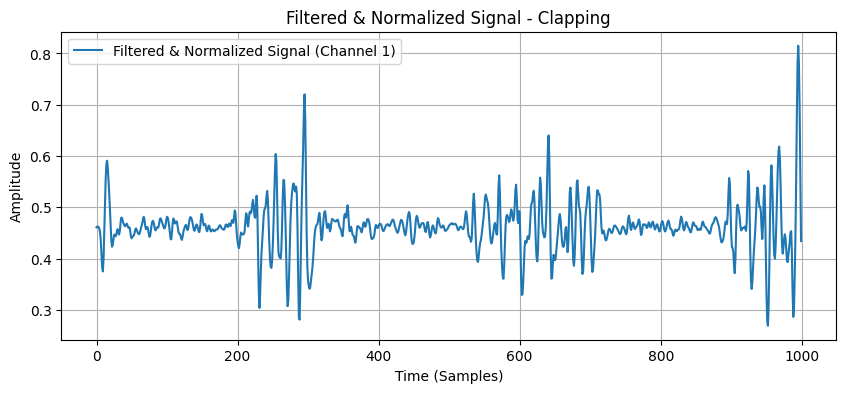


Processing Activity: Handshaking
Preprocessed data for Handshaking stored.


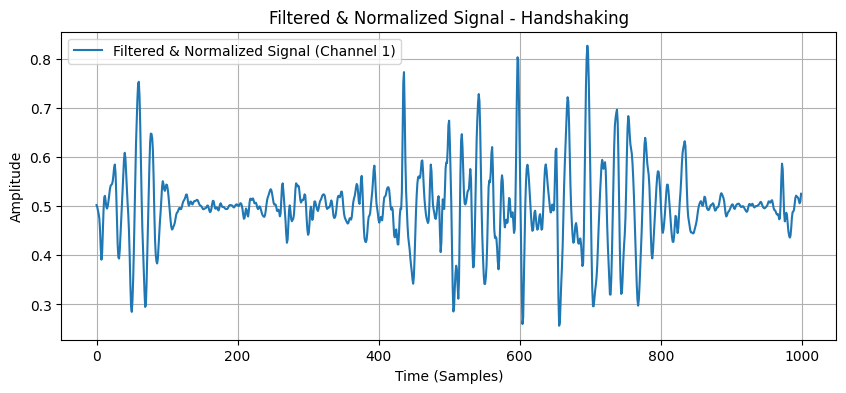


Processing Activity: Hugging
Preprocessed data for Hugging stored.


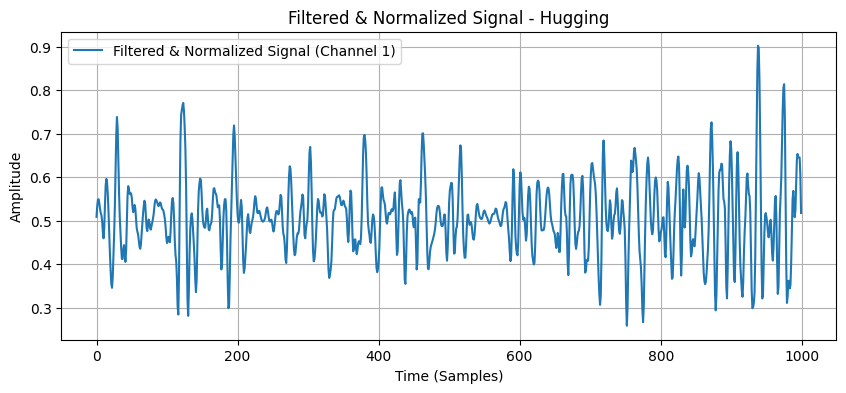


Processing Activity: Jumping
Preprocessed data for Jumping stored.


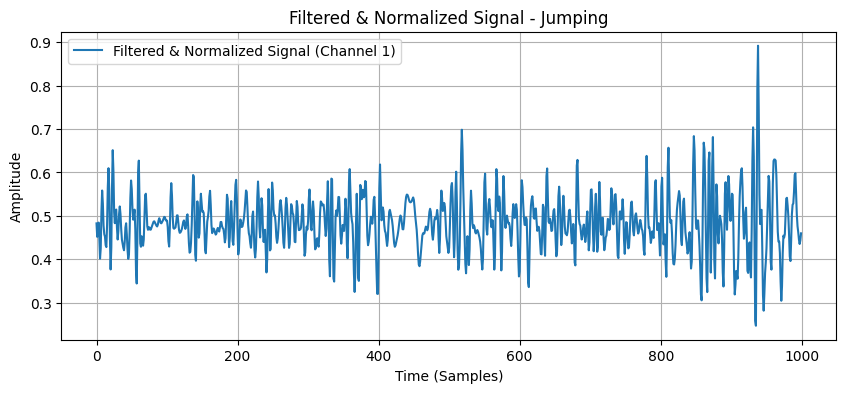


Processing Activity: Running
Preprocessed data for Running stored.


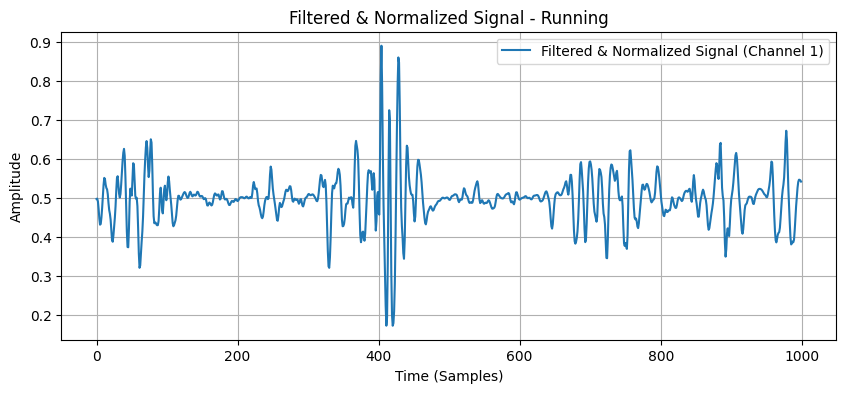


Processing Activity: Seating
Preprocessed data for Seating stored.


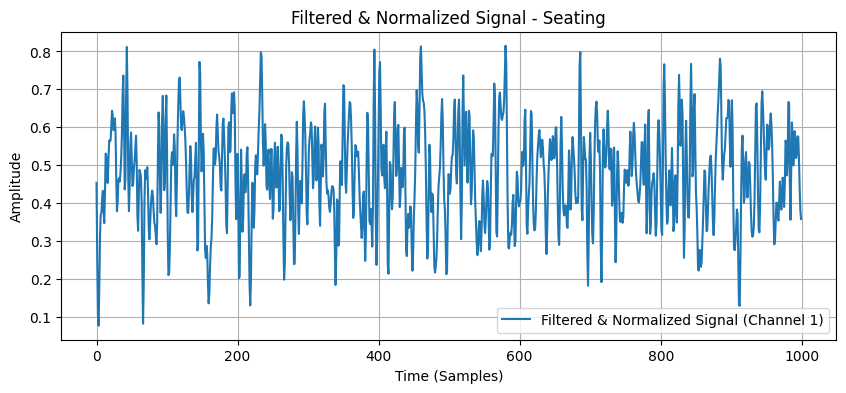


Processing Activity: Pushing
Preprocessed data for Pushing stored.


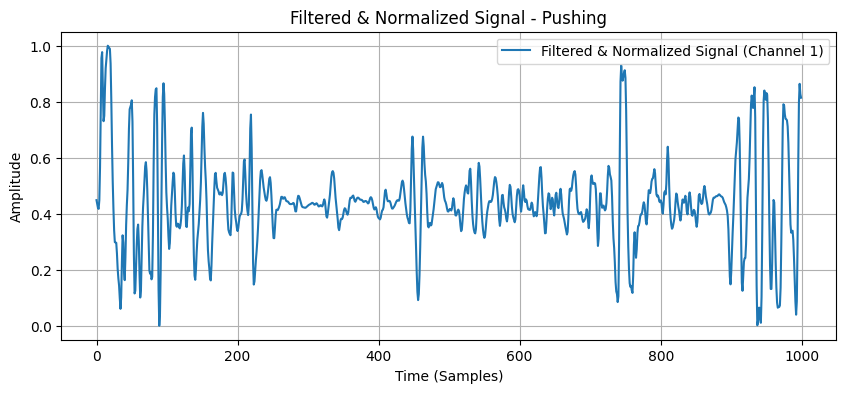


Processing Activity: Sidekicking
Preprocessed data for Sidekicking stored.


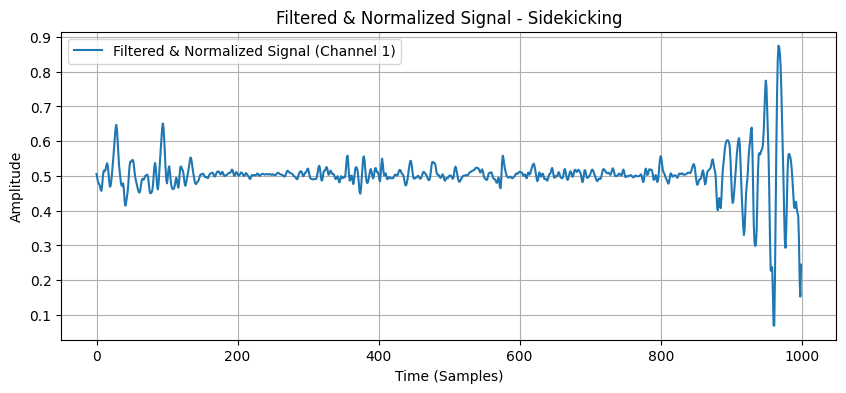


Processing Activity: Slapping
Preprocessed data for Slapping stored.


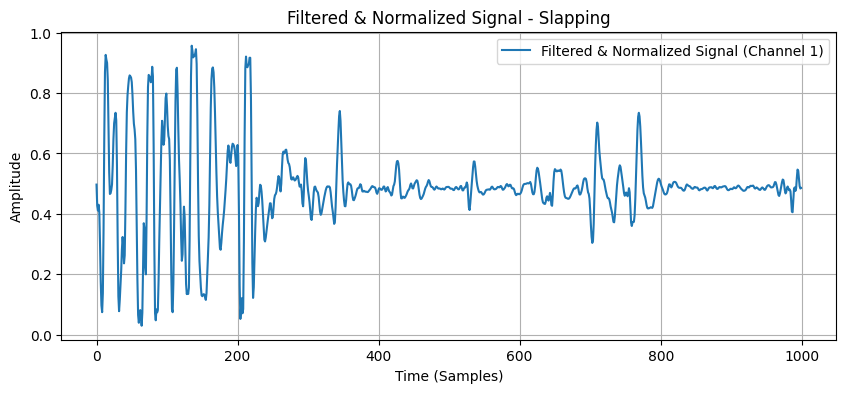


Processing Activity: Elbowing
Preprocessed data for Elbowing stored.


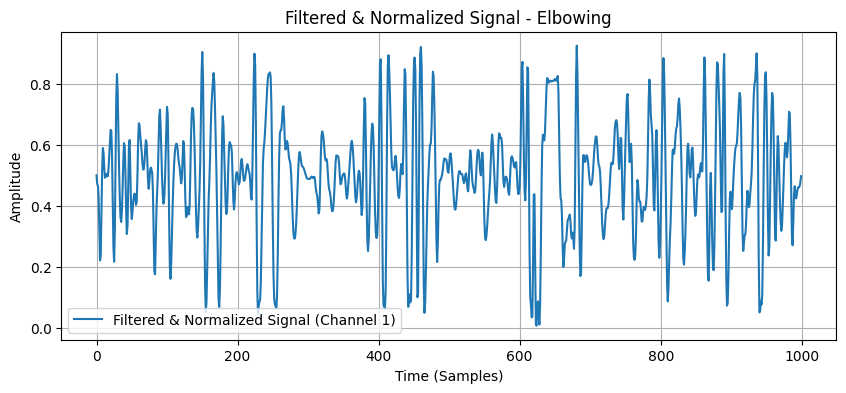


Processing Activity: Frontkicking
Preprocessed data for Frontkicking stored.


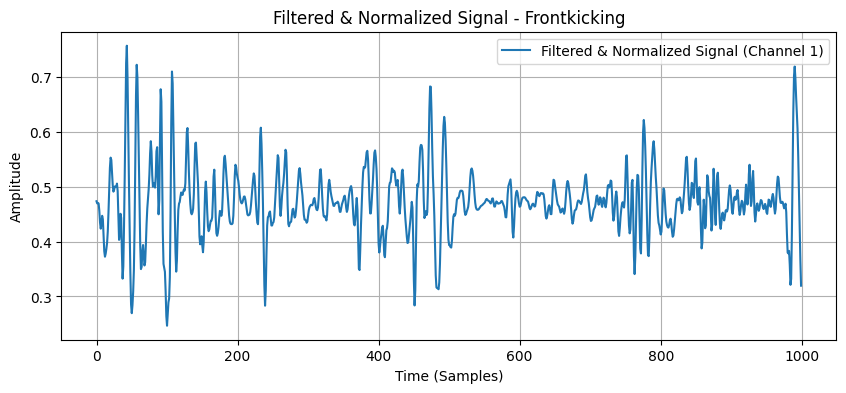


Processing Activity: Hamering
Preprocessed data for Hamering stored.


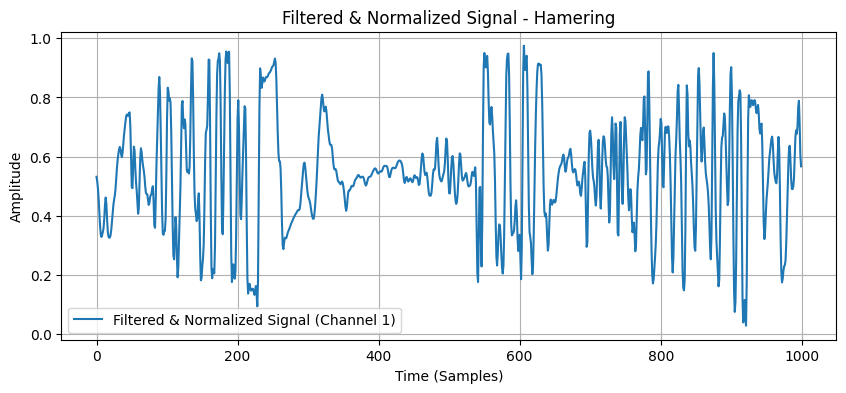


Processing Activity: Headering
Preprocessed data for Headering stored.


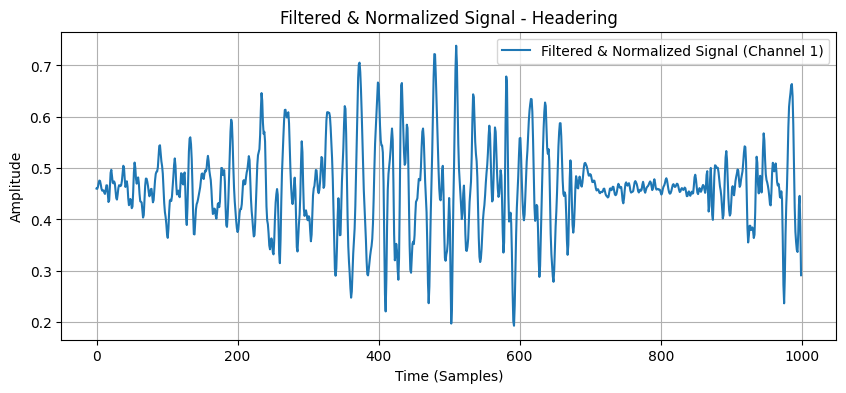


Processing Activity: Kneeing
Preprocessed data for Kneeing stored.


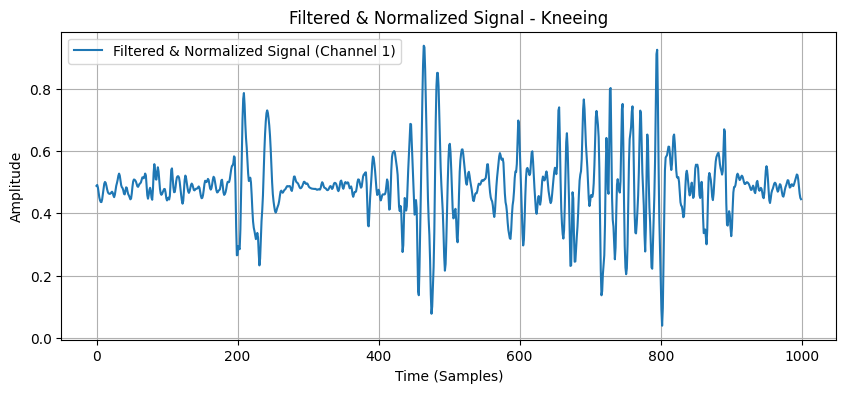


Processing Activity: Pulling
Preprocessed data for Pulling stored.


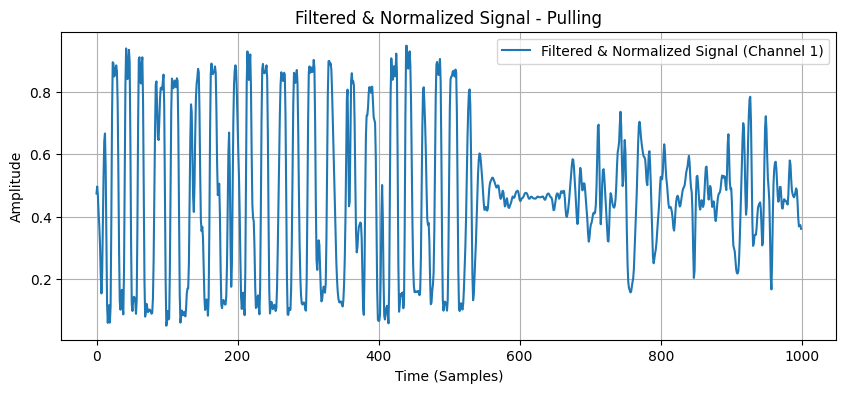


Processing Activity: Punching
Preprocessed data for Punching stored.


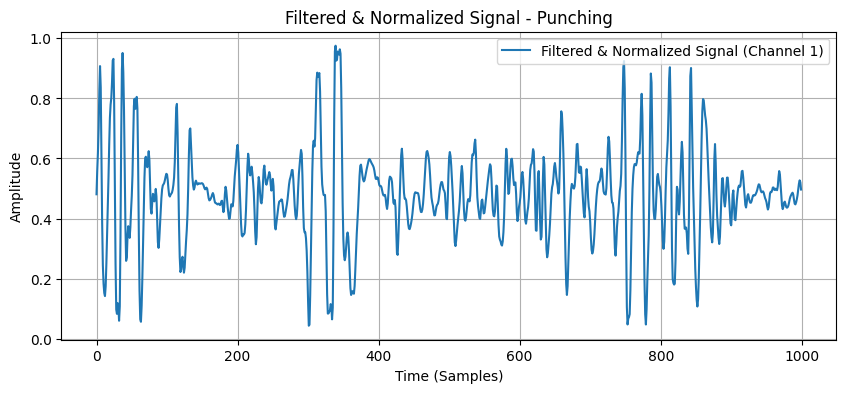

In [ ]:
# Fungsi untuk bandpass filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Parameter filter
sampling_rate = 1000  # Frekuensi sampling (Hz)
lowcut = 10           # Frekuensi cutoff rendah (Hz)
highcut = 250         # Frekuensi cutoff tinggi (Hz)

# Preprocessing untuk setiap aktivitas
preprocessed_data = {}
scaler = MinMaxScaler(feature_range=(0, 1))  # Normalisasi ke rentang 0-1

for activity, data in emg_data_dict.items():
    if data is not None:
        print(f"\nProcessing Activity: {activity}")

        # Step 1: Bandpass Filter untuk setiap saluran
        filtered_signals = []
        for col in data.columns:
            filtered_signal = butter_bandpass_filter(data[col], lowcut, highcut, sampling_rate)
            filtered_signals.append(filtered_signal)

        # Menggabungkan kembali sinyal yang difilter menjadi DataFrame
        filtered_data = pd.DataFrame(filtered_signals).T  # Transpose untuk kembali ke format asli

        # Step 2: Normalisasi (Skala ke rentang 0-1)
        normalized_data = pd.DataFrame(scaler.fit_transform(filtered_data), columns=data.columns)

        # Simpan hasil preprocessing ke dictionary
        preprocessed_data[activity] = normalized_data
        print(f"Preprocessed data for {activity} stored.")

        # Visualisasi salah satu saluran sinyal yang telah difilter dan dinormalisasi
        plt.figure(figsize=(10, 4))
        plt.plot(normalized_data[0][:1000], label="Filtered & Normalized Signal (Channel 1)")  # Plot 1000 sampel pertama
        plt.title(f"Filtered & Normalized Signal - {activity}")
        plt.xlabel("Time (Samples)")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.grid()
        plt.show()


##Bandpass + Linear Envelope + Root Mean Square


Processing Activity: Standing


<ipython-input-9-a9fa2fd78619>:28: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = cwt(data, morlet, scales)


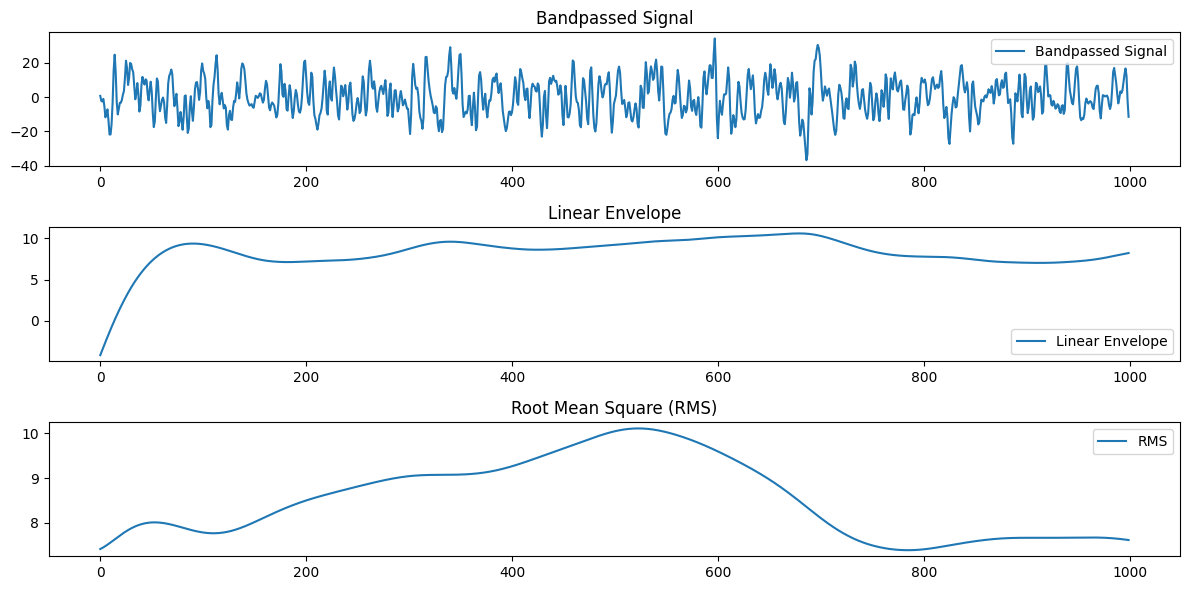


Processing Activity: Walking


<ipython-input-9-a9fa2fd78619>:28: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = cwt(data, morlet, scales)


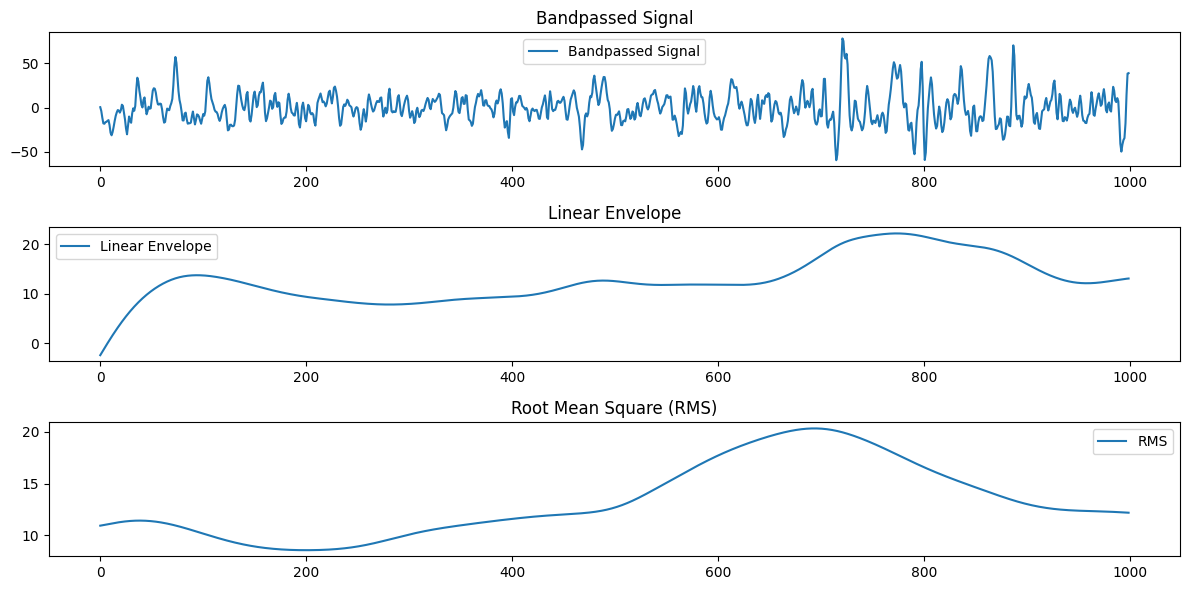


Processing Activity: Waving


<ipython-input-9-a9fa2fd78619>:28: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = cwt(data, morlet, scales)


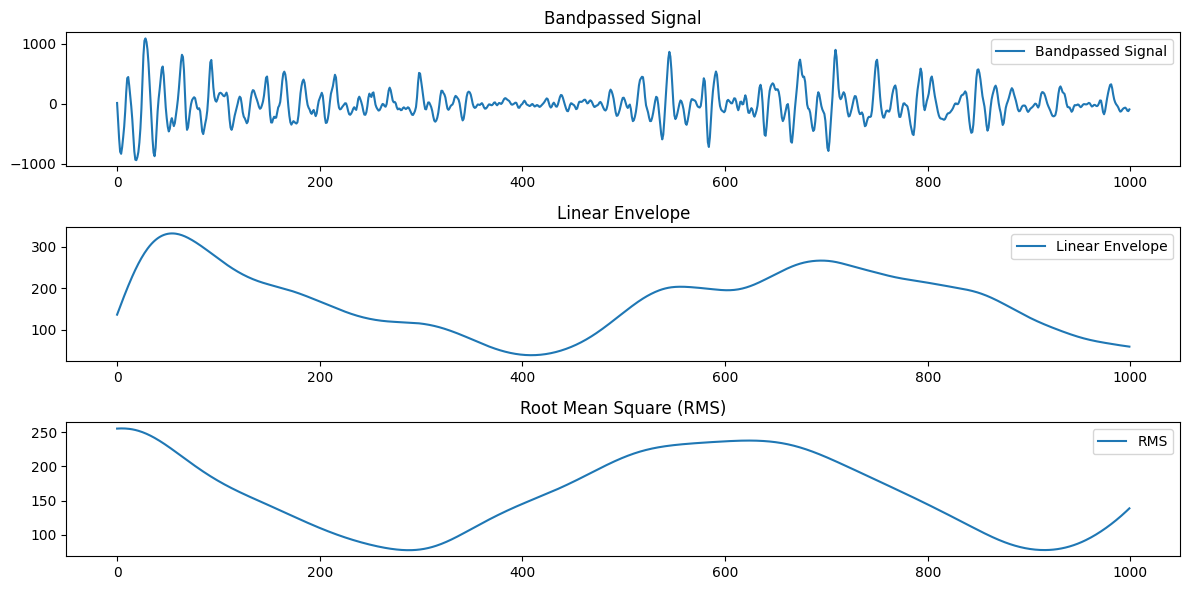


Processing Activity: Bowing


<ipython-input-9-a9fa2fd78619>:28: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = cwt(data, morlet, scales)


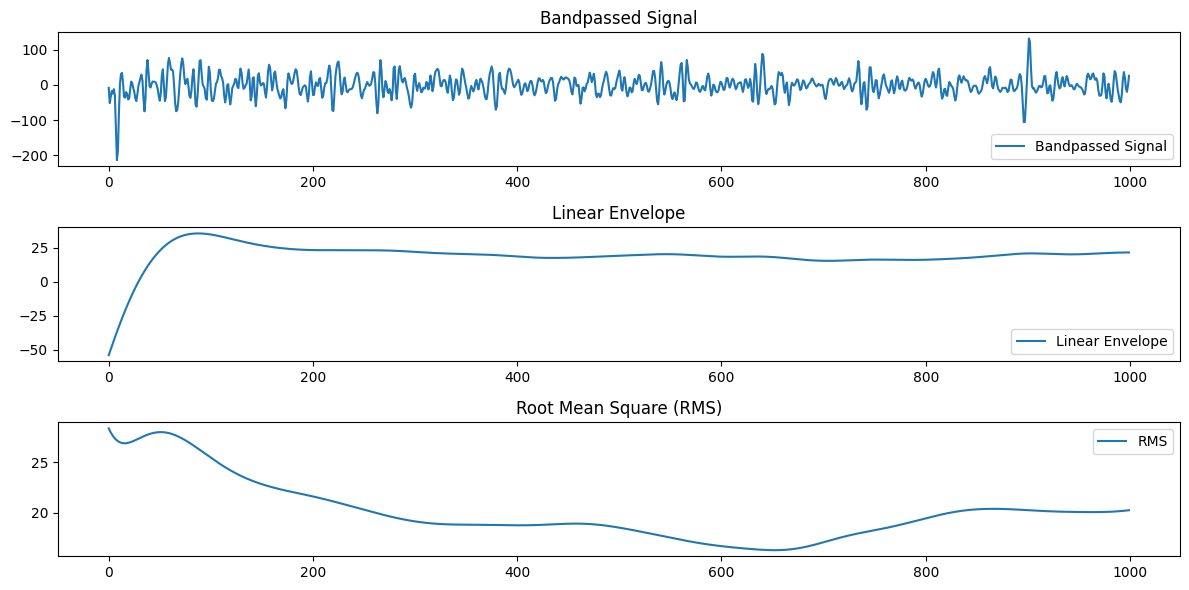


Processing Activity: Clapping


<ipython-input-9-a9fa2fd78619>:28: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = cwt(data, morlet, scales)


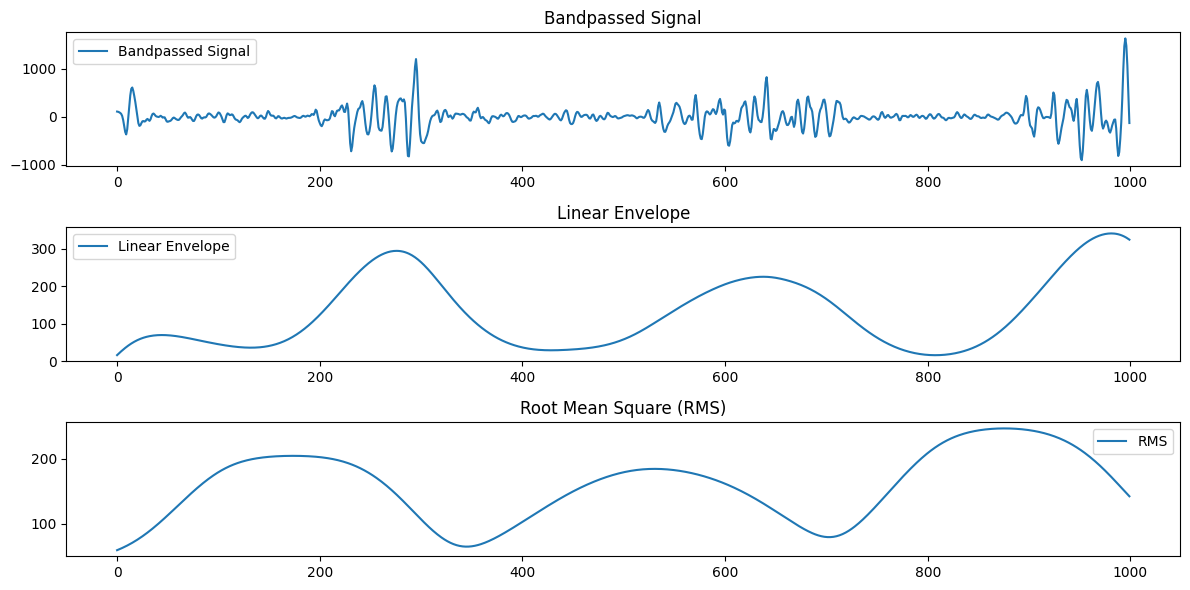


Processing Activity: Handshaking


<ipython-input-9-a9fa2fd78619>:28: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = cwt(data, morlet, scales)


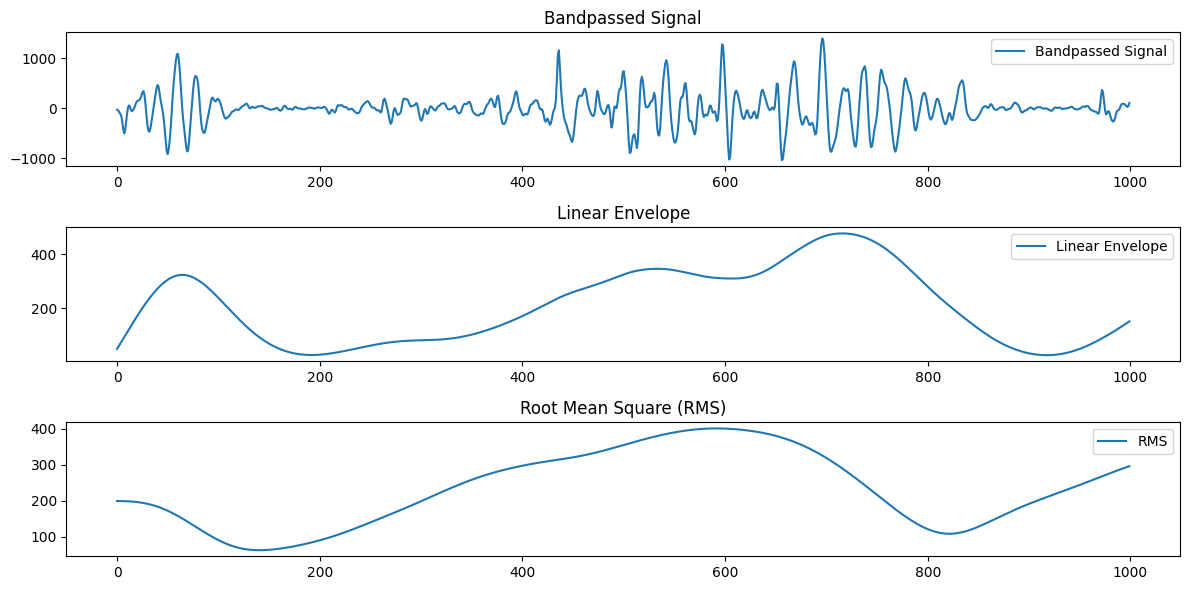


Processing Activity: Hugging


<ipython-input-9-a9fa2fd78619>:28: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = cwt(data, morlet, scales)


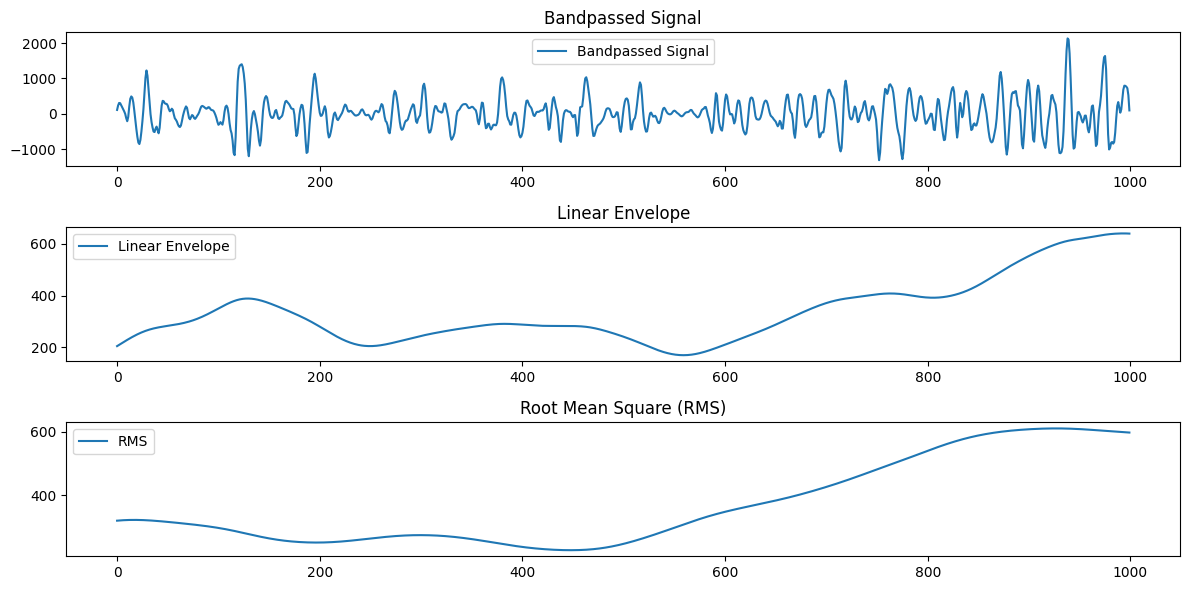


Processing Activity: Jumping


<ipython-input-9-a9fa2fd78619>:28: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = cwt(data, morlet, scales)


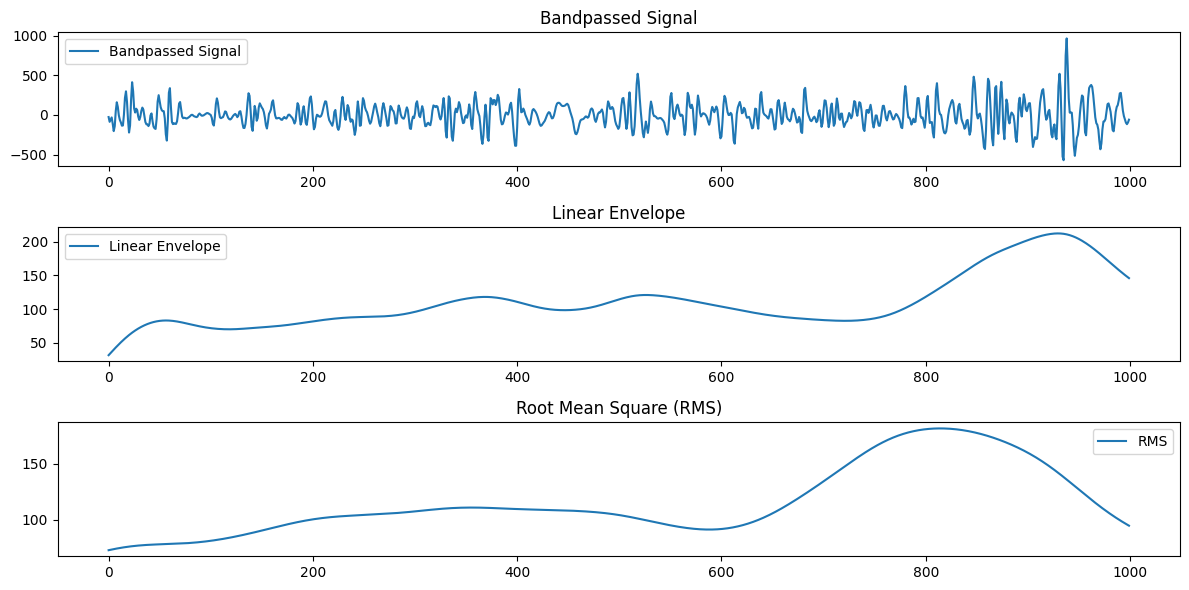


Processing Activity: Running


<ipython-input-9-a9fa2fd78619>:28: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = cwt(data, morlet, scales)


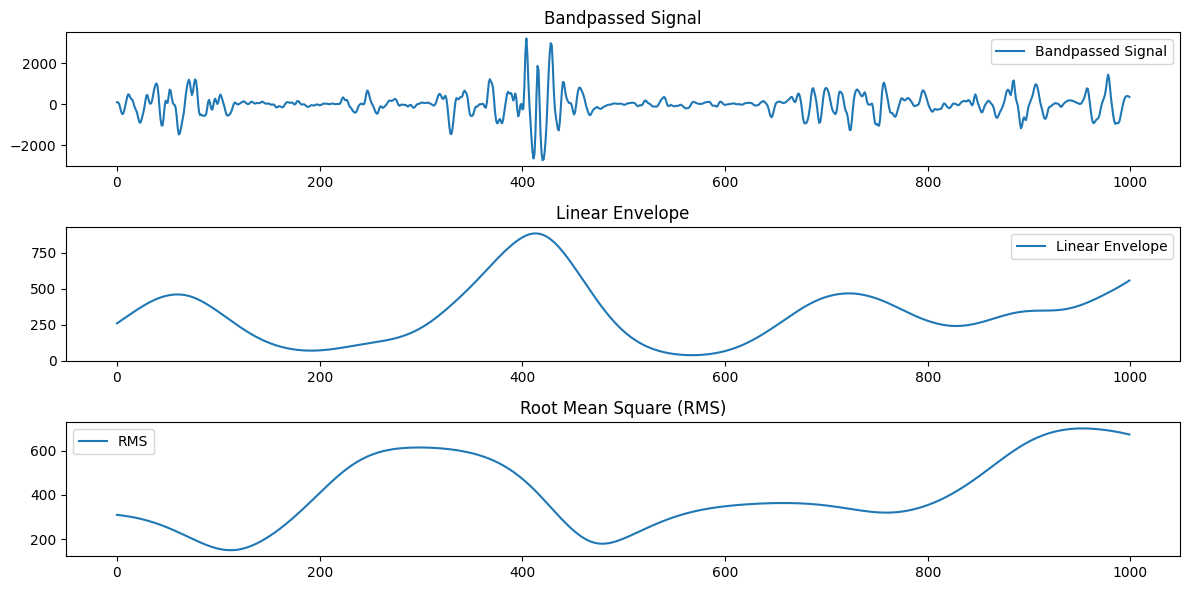


Processing Activity: Seating


<ipython-input-9-a9fa2fd78619>:28: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = cwt(data, morlet, scales)


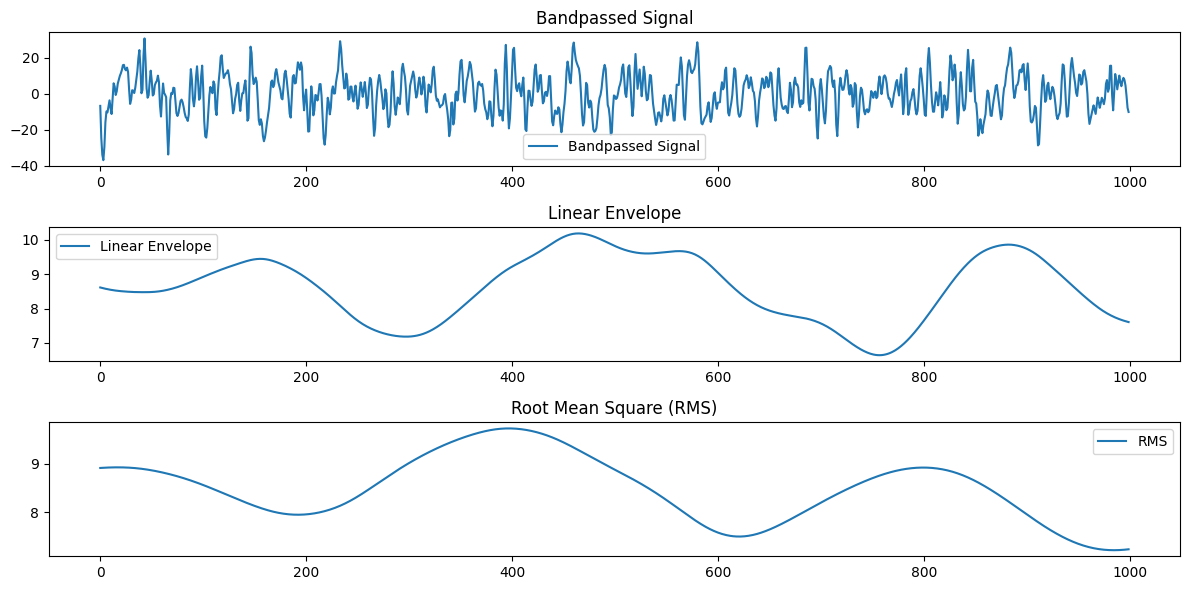


Processing Activity: Pushing


<ipython-input-9-a9fa2fd78619>:28: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = cwt(data, morlet, scales)


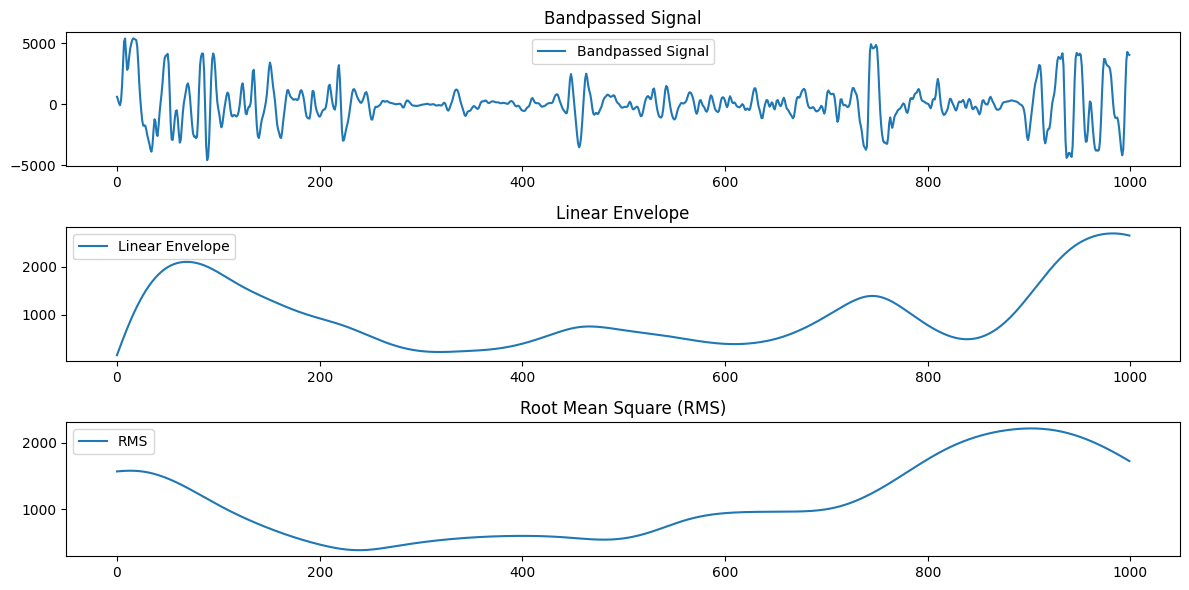


Processing Activity: Sidekicking


<ipython-input-9-a9fa2fd78619>:28: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = cwt(data, morlet, scales)


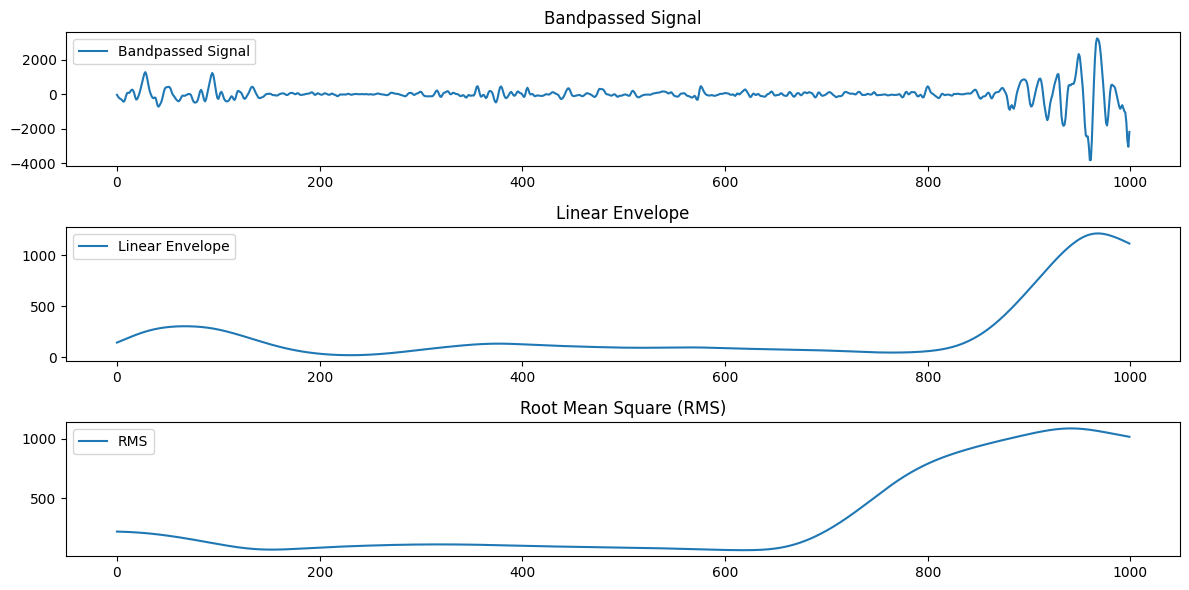


Processing Activity: Slapping


<ipython-input-9-a9fa2fd78619>:28: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = cwt(data, morlet, scales)


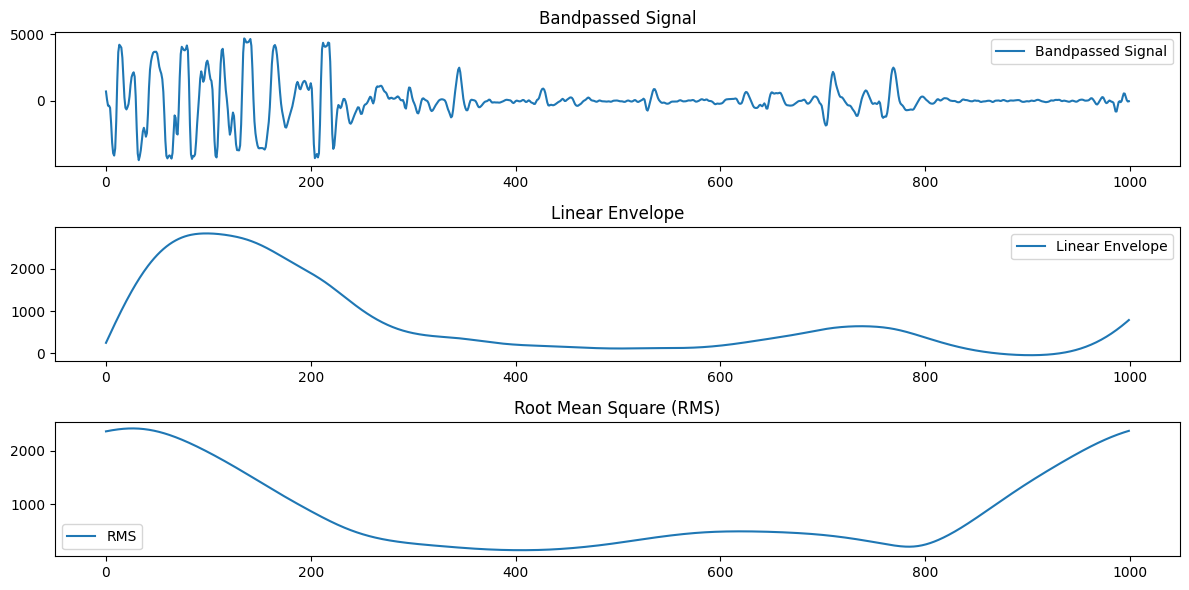


Processing Activity: Elbowing


<ipython-input-9-a9fa2fd78619>:28: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = cwt(data, morlet, scales)


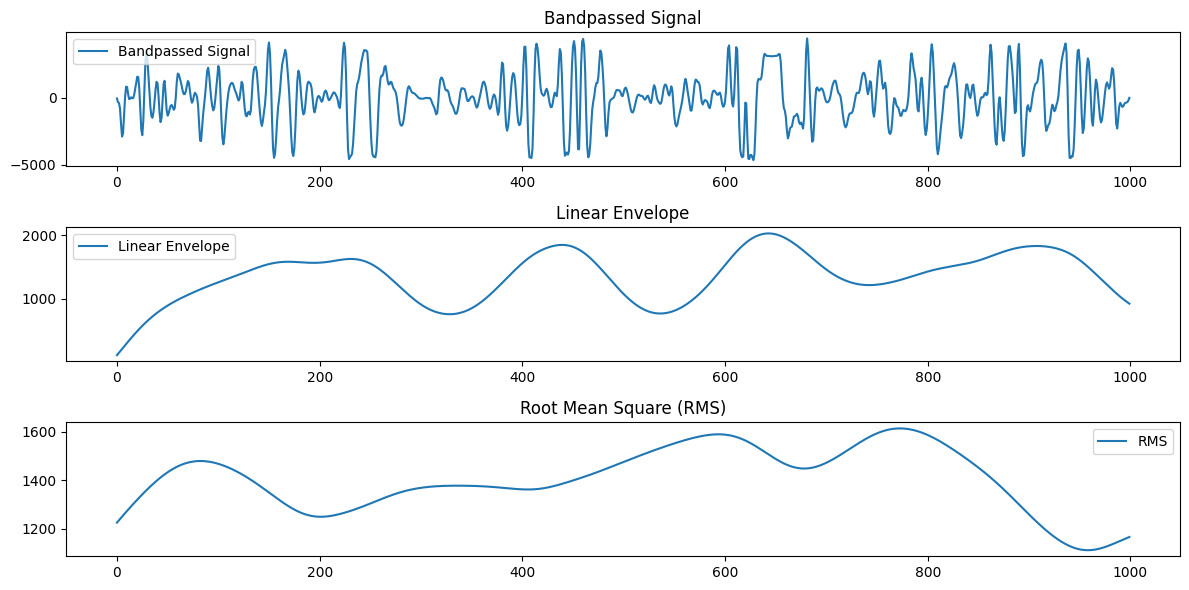


Processing Activity: Frontkicking


<ipython-input-9-a9fa2fd78619>:28: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = cwt(data, morlet, scales)


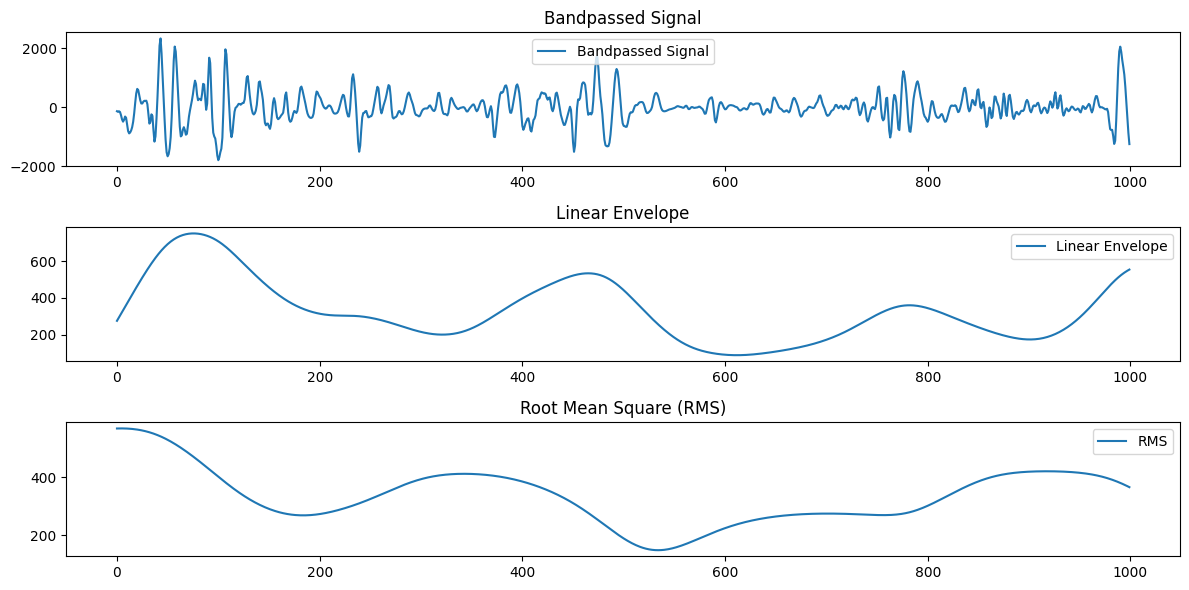


Processing Activity: Hamering


<ipython-input-9-a9fa2fd78619>:28: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = cwt(data, morlet, scales)


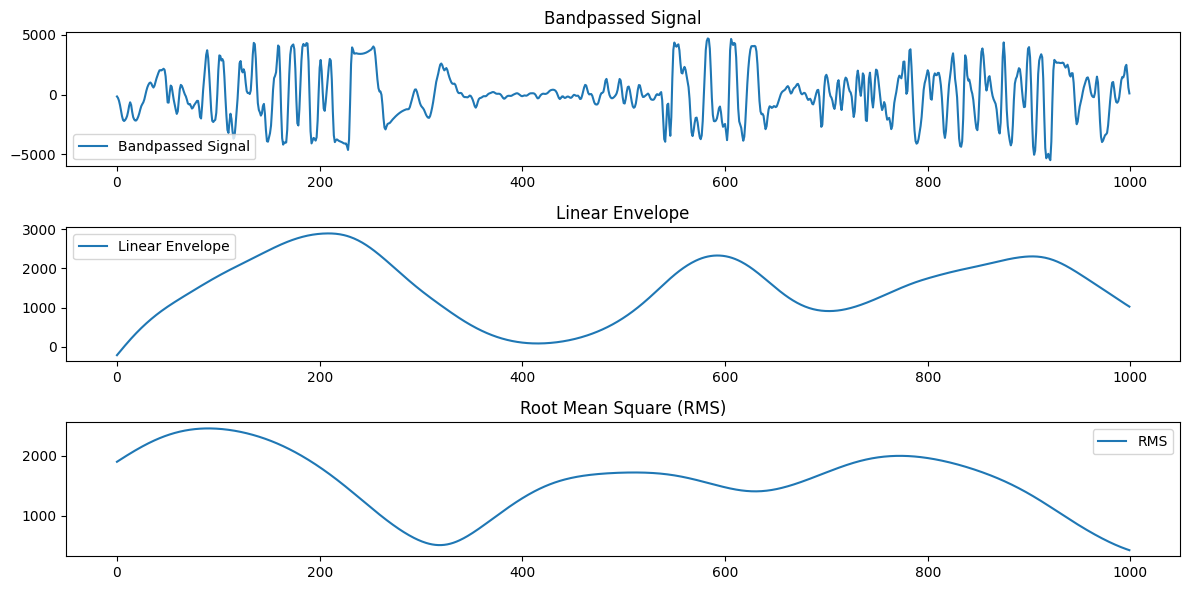


Processing Activity: Headering


<ipython-input-9-a9fa2fd78619>:28: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = cwt(data, morlet, scales)


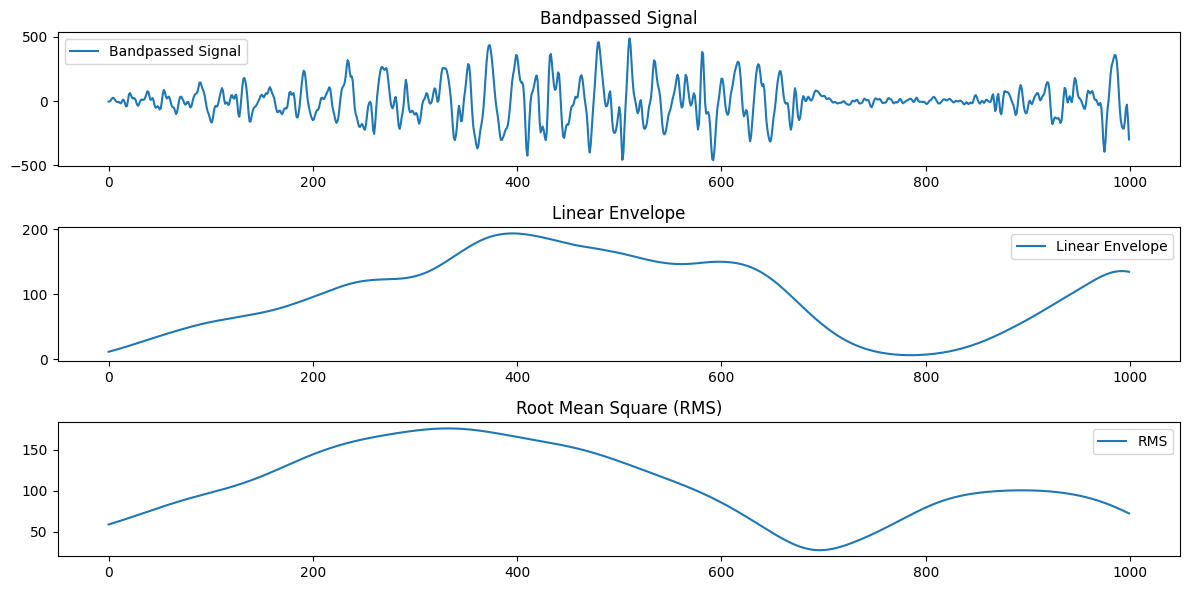


Processing Activity: Kneeing


<ipython-input-9-a9fa2fd78619>:28: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = cwt(data, morlet, scales)


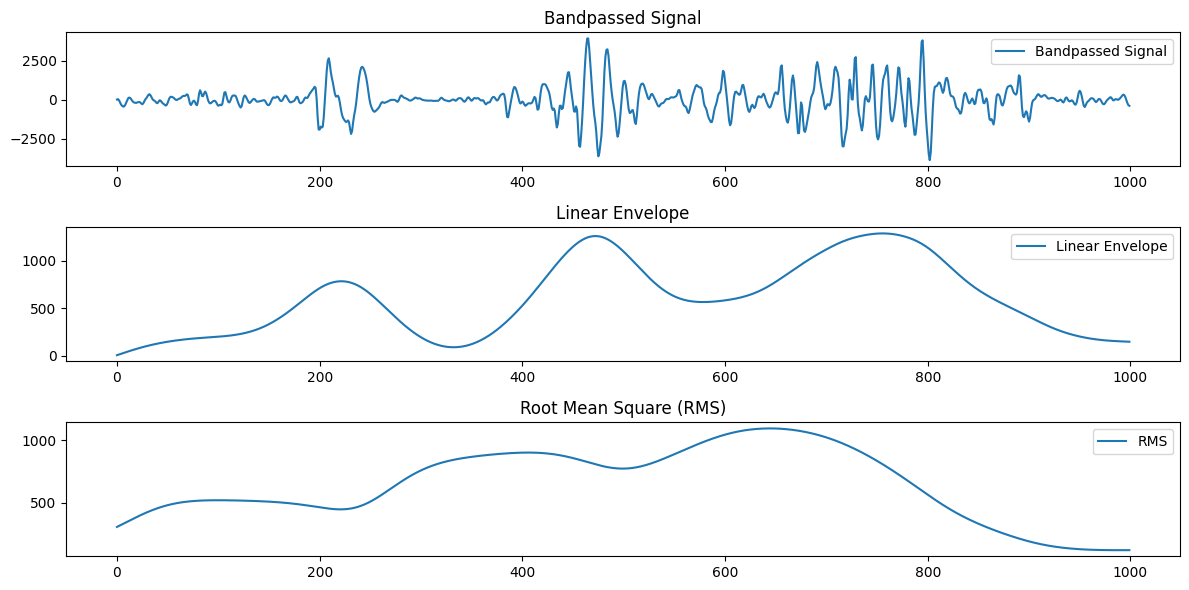


Processing Activity: Pulling


<ipython-input-9-a9fa2fd78619>:28: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = cwt(data, morlet, scales)


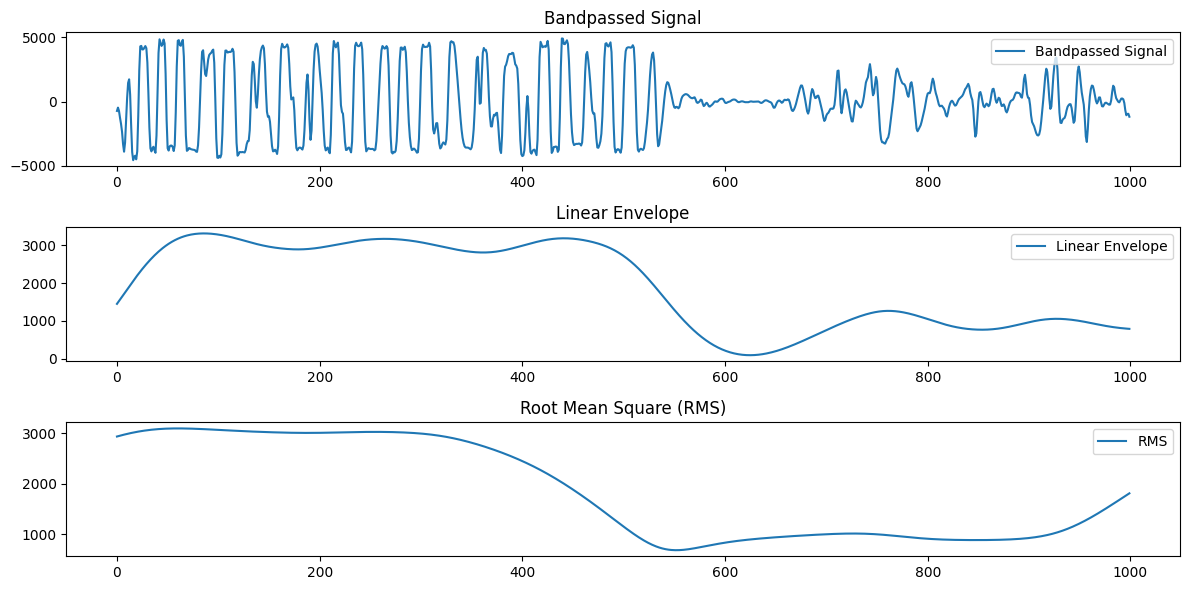


Processing Activity: Punching


<ipython-input-9-a9fa2fd78619>:28: DeprecationWarning: scipy.signal.cwt is deprecated in SciPy 1.12 and will be removed
in SciPy 1.15. We recommend using PyWavelets instead.

  cwt_matrix = cwt(data, morlet, scales)


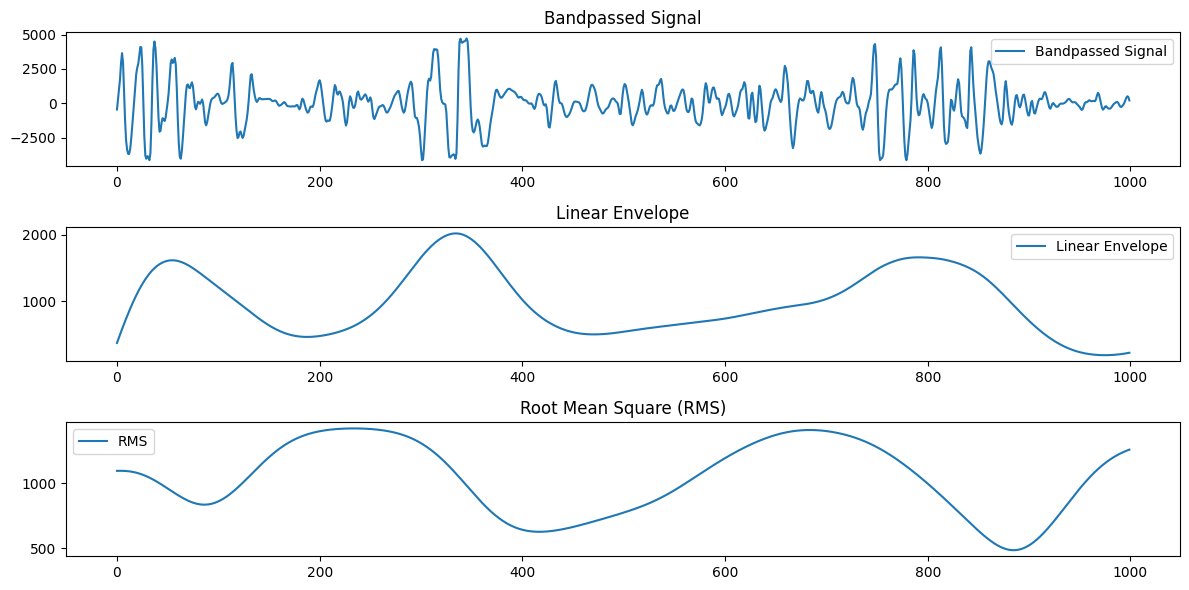

In [ ]:
# Fungsi untuk Butterworth bandpass filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Fungsi untuk Butterworth lowpass filter
def butter_lowpass_filter(data, cutoff, fs, order=2):
    nyquist = 0.5 * fs
    normalized_cutoff = cutoff / nyquist
    b, a = butter(order, normalized_cutoff, btype='low')
    return filtfilt(b, a, data)

# Fungsi untuk menghitung Linear Envelope (LE)
def compute_linear_envelope(data, lowcut, fs):
    return butter_lowpass_filter(np.abs(data), lowcut, fs)

# Fungsi untuk menghitung Root Mean Square (RMS)
def compute_rms(data, window_size):
    rms = np.sqrt(np.convolve(data**2, np.ones(window_size)/window_size, mode='valid'))
    return rms

# Fungsi untuk Continuous Wavelet Transform (CWT) dan energi lokal
def compute_cwt_energy(data, fs):
    scales = np.arange(1, 128)  # Skala untuk wavelet
    cwt_matrix = cwt(data, morlet, scales)
    energy = np.sum(np.abs(cwt_matrix)**2, axis=0)
    return energy

# Parameter filter dan lainnya
sampling_rate = 1000  # Frekuensi sampling (Hz)
lowcut_bandpass = 10  # Frekuensi cutoff rendah untuk bandpass (Hz)
highcut_bandpass = 250  # Frekuensi cutoff tinggi untuk bandpass (Hz)
lowcut_lowpass = 5     # Frekuensi cutoff rendah untuk lowpass (Hz)
rms_window_size = 200  # Ukuran jendela untuk RMS (sampel)

# Preprocessing untuk setiap aktivitas
preprocessed_data = {}

for activity, data in emg_data_dict.items():
    if data is not None:
        print(f"\nProcessing Activity: {activity}")

        # Step 1: Bandpass Filtering
        bandpassed_signals = []
        for col in data.columns:
            bandpassed_signal = butter_bandpass_filter(data[col], lowcut_bandpass, highcut_bandpass, sampling_rate)
            bandpassed_signals.append(bandpassed_signal)

        # Menggabungkan kembali sinyal menjadi DataFrame
        bandpassed_data = pd.DataFrame(bandpassed_signals).T

        # Step 2: Linear Envelope
        linear_envelope_signals = []
        for col in bandpassed_data.columns:
            le_signal = compute_linear_envelope(bandpassed_data[col], lowcut_lowpass, sampling_rate)
            linear_envelope_signals.append(le_signal)
        linear_envelope_data = pd.DataFrame(linear_envelope_signals).T

        # Step 3: RMS
        rms_signals = []
        for col in linear_envelope_data.columns:
            rms_signal = compute_rms(linear_envelope_data[col], rms_window_size)
            rms_signals.append(rms_signal)

        # Step 4: CWT dan Energi Lokal
        cwt_energies = []
        for col in bandpassed_data.columns:
            cwt_energy = compute_cwt_energy(bandpassed_data[col], sampling_rate)
            cwt_energies.append(cwt_energy)

        # Simpan hasil preprocessing ke dictionary
        preprocessed_data[activity] = {
            "bandpassed": bandpassed_data,
            "linear_envelope": linear_envelope_data,
            "rms": rms_signals,
            "cwt_energy": cwt_energies,
        }

        # Visualisasi salah satu sinyal
        plt.figure(figsize=(12, 6))
        plt.subplot(3, 1, 1)
        plt.plot(bandpassed_data[0][:1000], label="Bandpassed Signal")
        plt.title("Bandpassed Signal")
        plt.legend()

        plt.subplot(3, 1, 2)
        plt.plot(linear_envelope_data[0][:1000], label="Linear Envelope")
        plt.title("Linear Envelope")
        plt.legend()

        plt.subplot(3, 1, 3)
        plt.plot(rms_signals[0][:1000], label="RMS")
        plt.title("Root Mean Square (RMS)")
        plt.legend()

        plt.tight_layout()
        plt.show()


## Perbandingan visual antar aktivitas

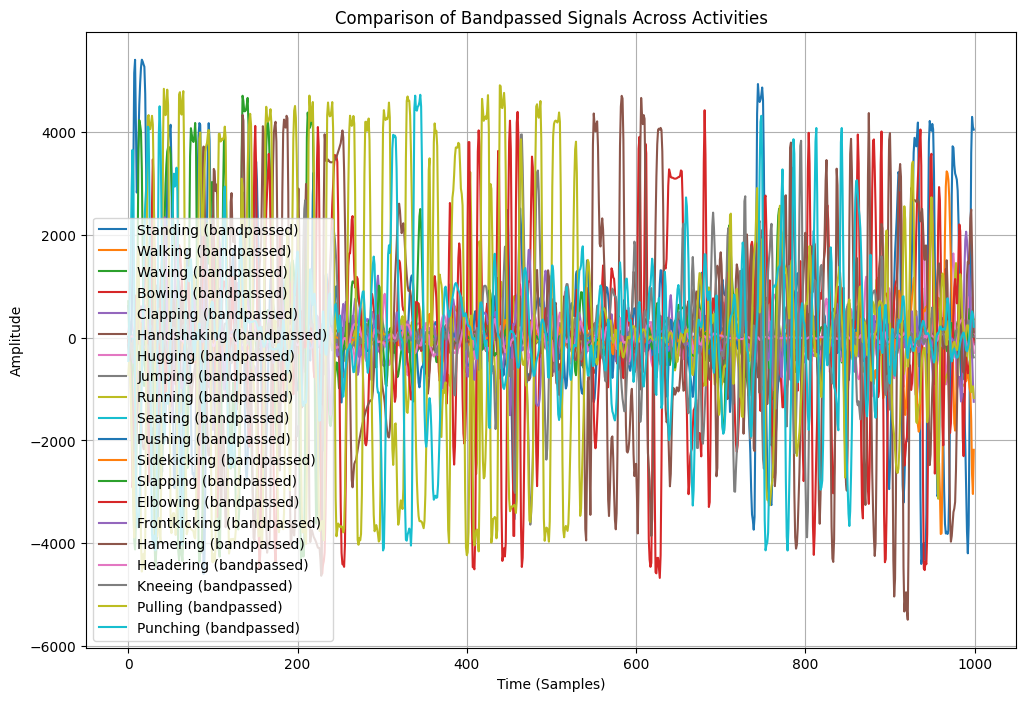

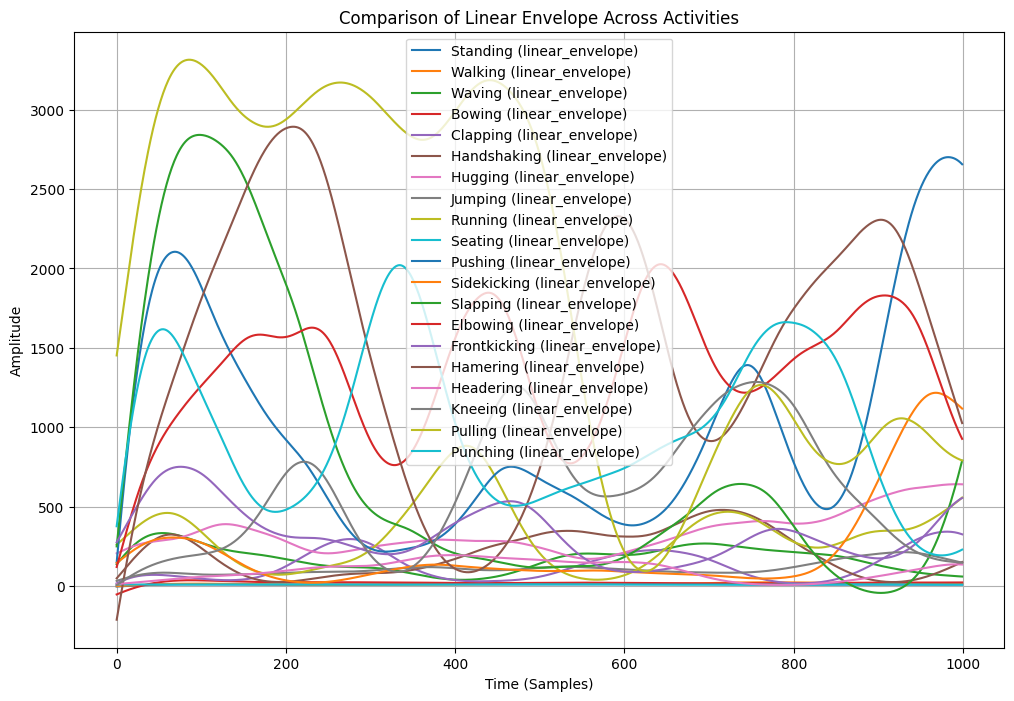

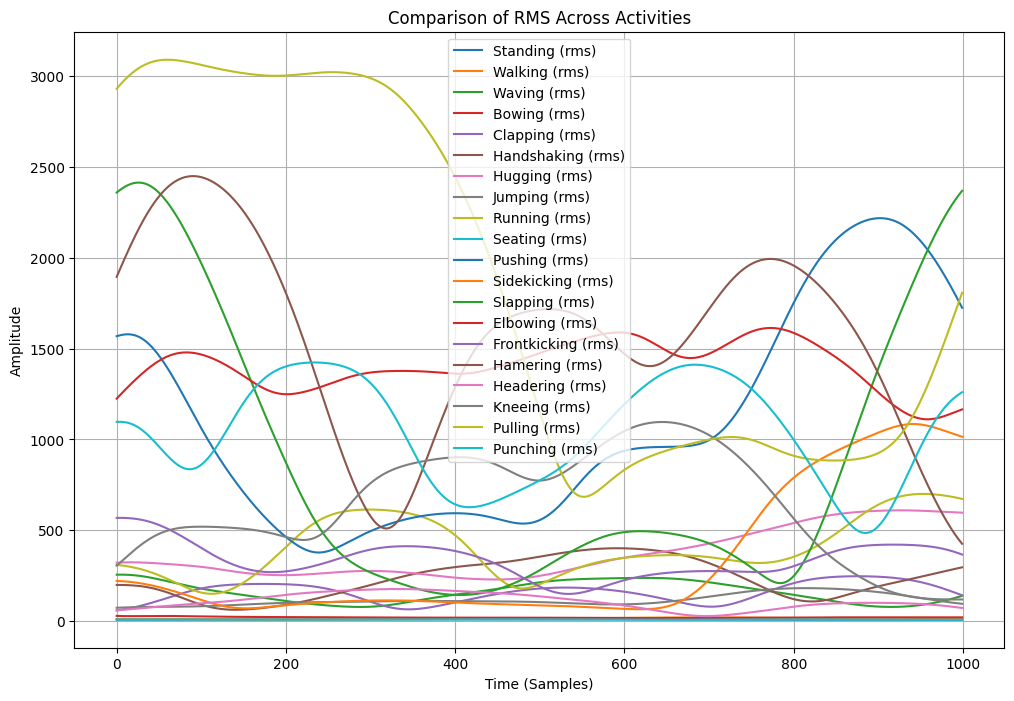

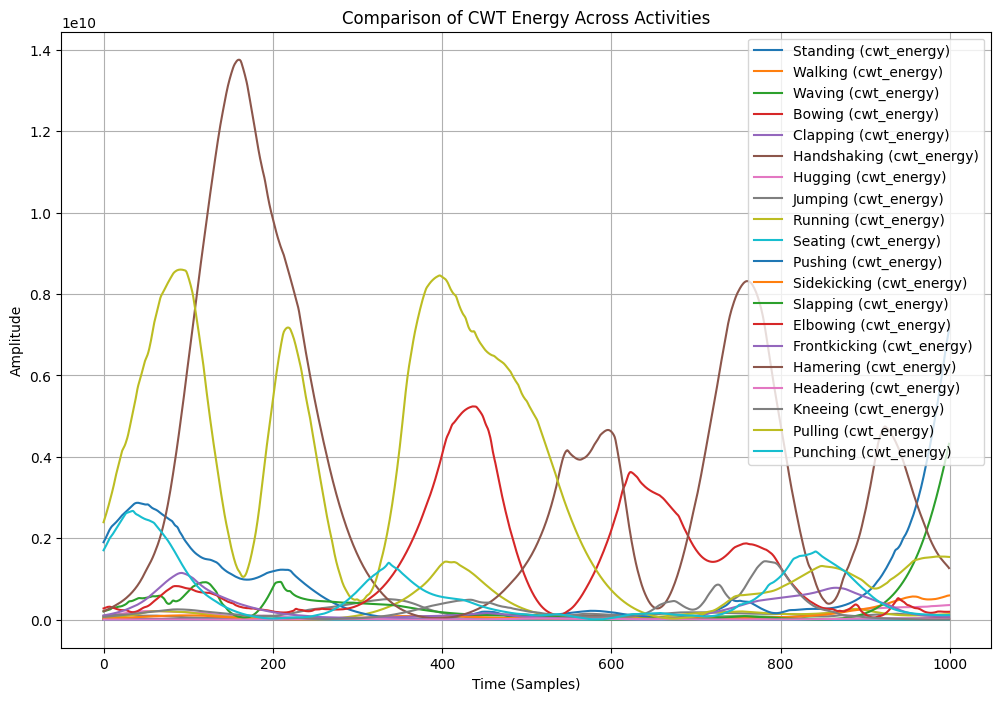

In [ ]:
# Fungsi untuk membuat perbandingan visual antar aktivitas
def visualize_comparison(preprocessed_data, signal_type, title):
    plt.figure(figsize=(12, 8))
    for activity, data in preprocessed_data.items():
        if signal_type == "bandpassed":
            signal = data["bandpassed"][0][:1000]  # Mengambil 1000 sampel pertama dari channel pertama
        elif signal_type == "linear_envelope":
            signal = data["linear_envelope"][0][:1000]
        elif signal_type == "rms":
            signal = data["rms"][0][:1000]
        elif signal_type == "cwt_energy":
            signal = data["cwt_energy"][0][:1000]
        else:
            raise ValueError("Invalid signal type specified.")

        plt.plot(signal, label=f"{activity} ({signal_type})")

    plt.title(title)
    plt.xlabel("Time (Samples)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()
    plt.show()

# Membandingkan aktivitas pada sinyal yang berbeda
visualize_comparison(preprocessed_data, signal_type="bandpassed", title="Comparison of Bandpassed Signals Across Activities")
visualize_comparison(preprocessed_data, signal_type="linear_envelope", title="Comparison of Linear Envelope Across Activities")
visualize_comparison(preprocessed_data, signal_type="rms", title="Comparison of RMS Across Activities")
visualize_comparison(preprocessed_data, signal_type="cwt_energy", title="Comparison of CWT Energy Across Activities")


## Normal vs Agresif

<ipython-input-4-39f49139e74d>:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)
<ipython-input-4-39f49139e74d>:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)
<ipython-input-4-39f49139e74d>:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)
<ipython-input-4-39f49139e74d>:28: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)
<ipython-input-4-39f

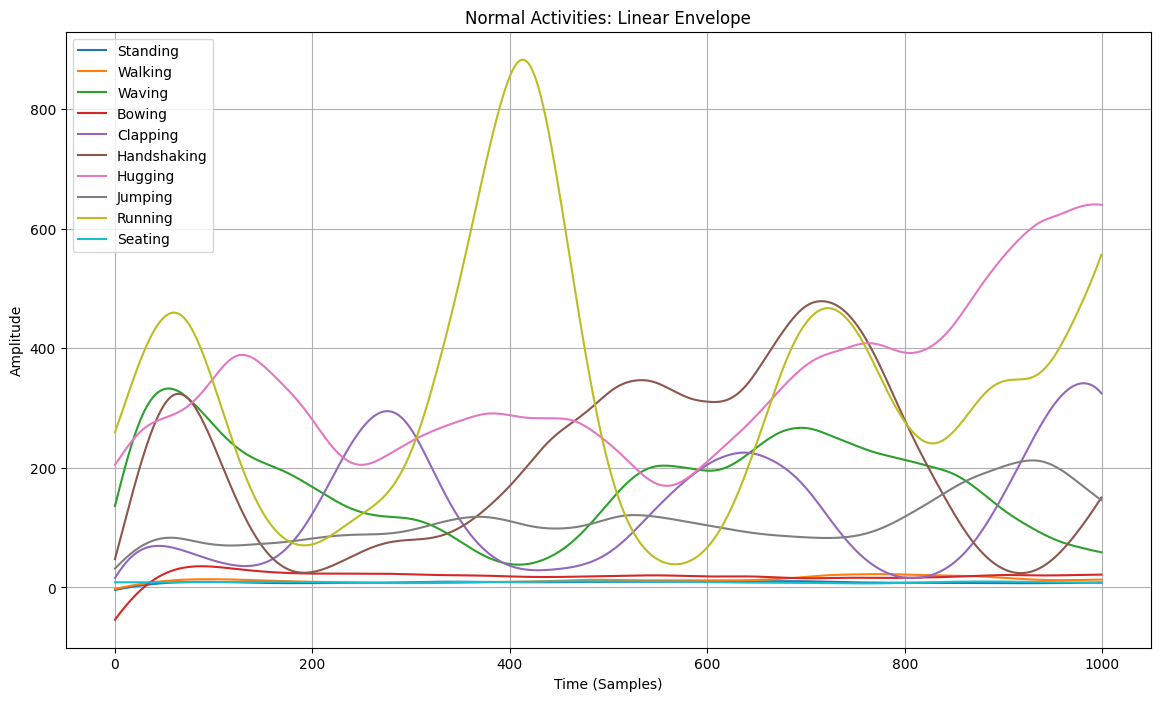

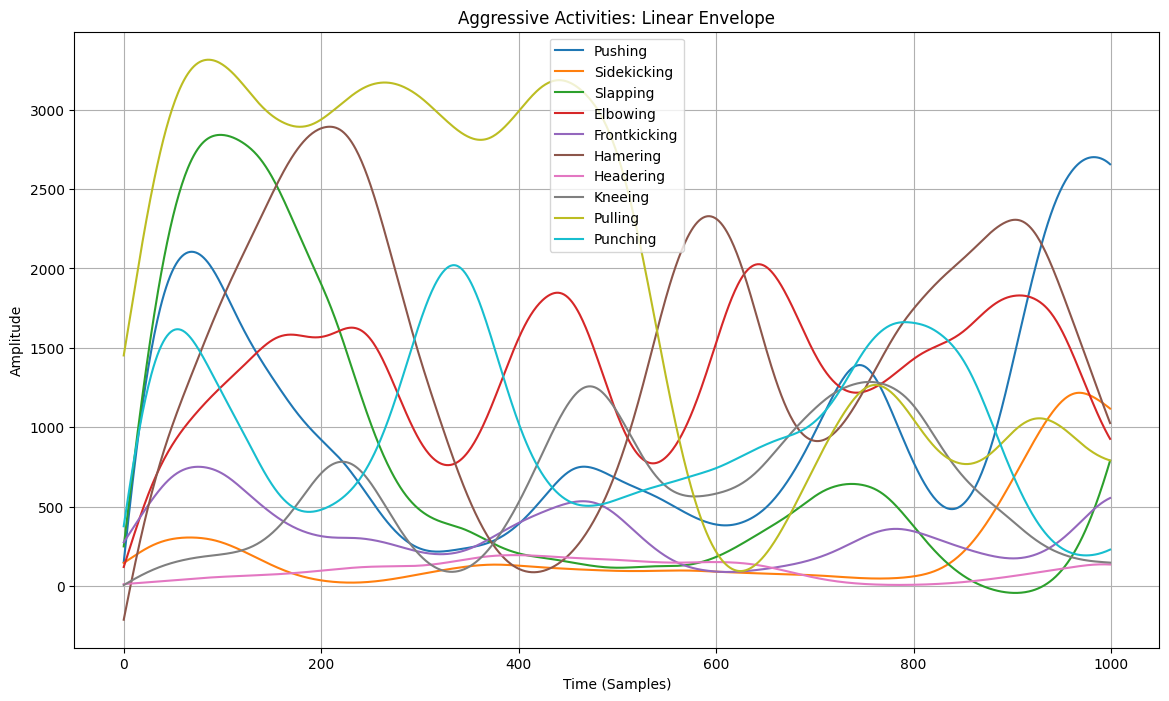

In [ ]:
# Fungsi untuk Butterworth bandpass filter
def butter_bandpass_filter(data, lowcut, highcut, fs, order=2):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Fungsi untuk Linear Envelope
def compute_linear_envelope(data, lowcut, fs):
    nyquist = 0.5 * fs
    normalized_cutoff = lowcut / nyquist
    b, a = butter(2, normalized_cutoff, btype='low')
    return filtfilt(b, a, np.abs(data))

# Parameter filter
sampling_rate = 1000  # Hz
lowcut_bandpass = 10
highcut_bandpass = 250
lowcut_lowpass = 5

# Preprocessing setiap file
emg_data_dict = {path.replace(".txt", ""): load_emg_data(path) for path in file_paths}
preprocessed_data = {}
for activity, data in emg_data_dict.items():
    if data is not None:
        # Bandpass filter
        bandpassed_data = butter_bandpass_filter(data.iloc[:, 0], lowcut_bandpass, highcut_bandpass, sampling_rate)

        # Linear Envelope
        linear_envelope = compute_linear_envelope(bandpassed_data, lowcut_lowpass, sampling_rate)

        # Simpan hasil preprocessing
        preprocessed_data[activity] = {
            "bandpassed": bandpassed_data,
            "linear_envelope": linear_envelope
        }

# Kategori gerakan
normal_activities = [
    "Standing", "Walking", "Waving", "Bowing", "Clapping",
    "Handshaking", "Hugging", "Jumping", "Running", "Seating"
]

aggressive_activities = [
    "Pushing", "Sidekicking", "Slapping", "Elbowing", "Frontkicking",
    "Hamering", "Headering", "Kneeing", "Pulling", "Punching"
]

# Visualisasi perbandingan
def visualize_comparison(preprocessed_data, activities, title, signal_type="linear_envelope"):
    plt.figure(figsize=(14, 8))
    for activity in activities:
        if activity in preprocessed_data:
            signal = preprocessed_data[activity][signal_type][:1000]  # 1000 sampel pertama
            plt.plot(signal, label=f"{activity}")

    plt.title(title)
    plt.xlabel("Time (Samples)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.grid()
    plt.show()

# Visualisasi gerakan normal
visualize_comparison(preprocessed_data, normal_activities, "Normal Activities: Linear Envelope")

# Visualisasi gerakan agresif
visualize_comparison(preprocessed_data, aggressive_activities, "Aggressive Activities: Linear Envelope")


## Deteksi kontraksi otot berdasarkan puncak negatif

<ipython-input-20-7f9dc14b612e>:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


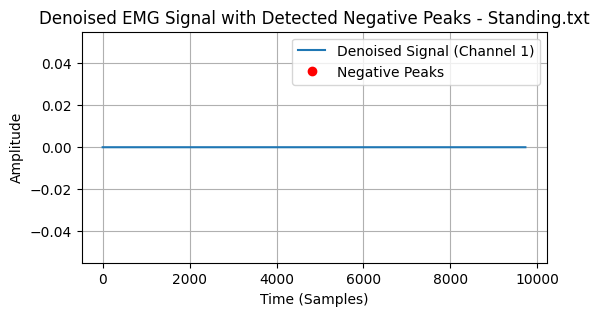

File: Standing.txt | Total contractions detected: 0


<ipython-input-20-7f9dc14b612e>:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


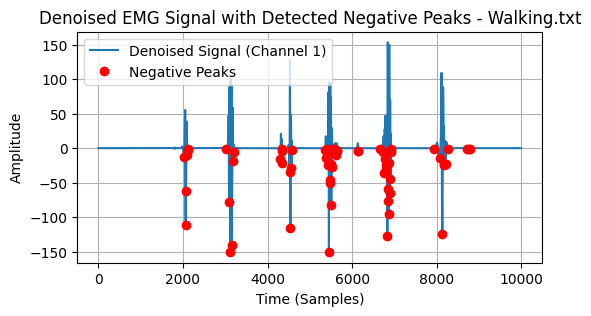

File: Walking.txt | Total contractions detected: 67


<ipython-input-20-7f9dc14b612e>:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


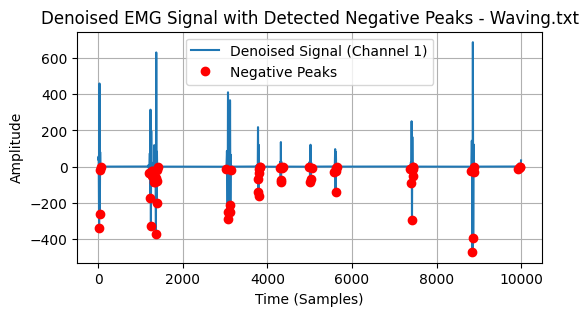

File: Waving.txt | Total contractions detected: 62


<ipython-input-20-7f9dc14b612e>:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


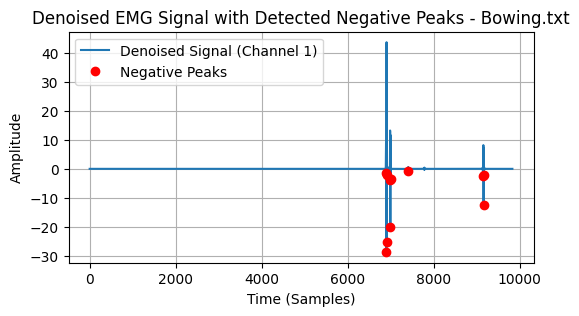

File: Bowing.txt | Total contractions detected: 11


<ipython-input-20-7f9dc14b612e>:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


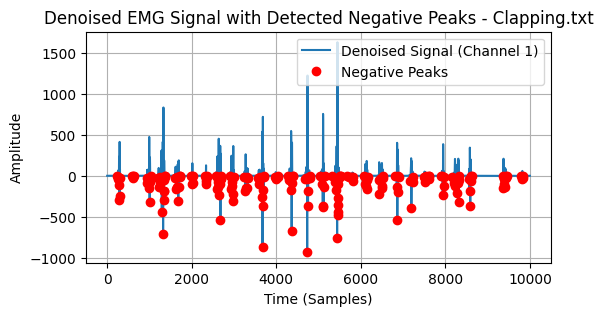

File: Clapping.txt | Total contractions detected: 205


<ipython-input-20-7f9dc14b612e>:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


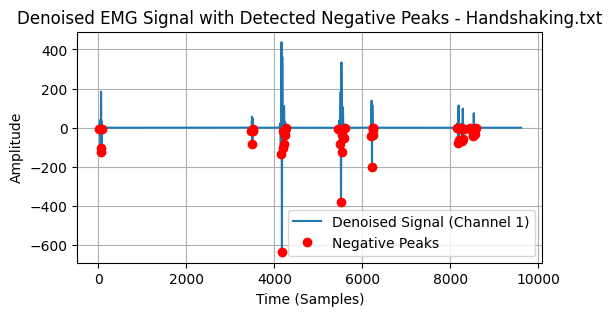

File: Handshaking.txt | Total contractions detected: 44


<ipython-input-20-7f9dc14b612e>:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


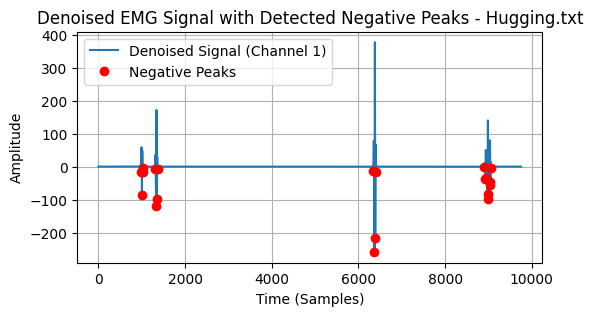

File: Hugging.txt | Total contractions detected: 20


<ipython-input-20-7f9dc14b612e>:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


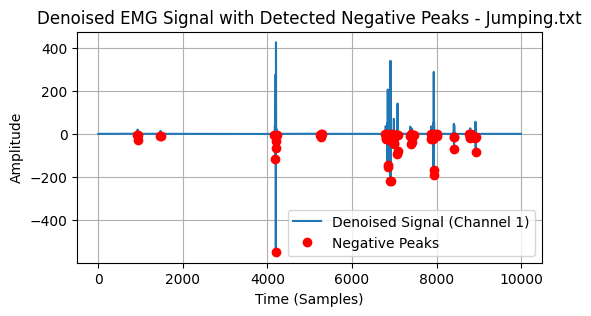

File: Jumping.txt | Total contractions detected: 63


<ipython-input-20-7f9dc14b612e>:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


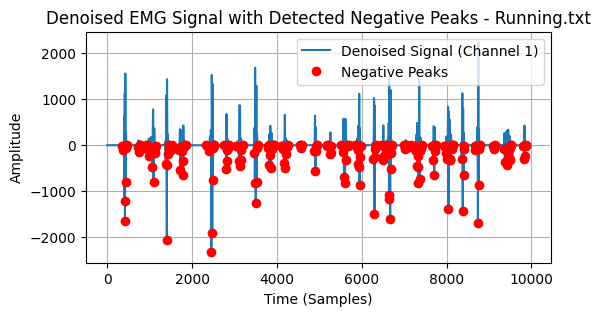

File: Running.txt | Total contractions detected: 235


<ipython-input-20-7f9dc14b612e>:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


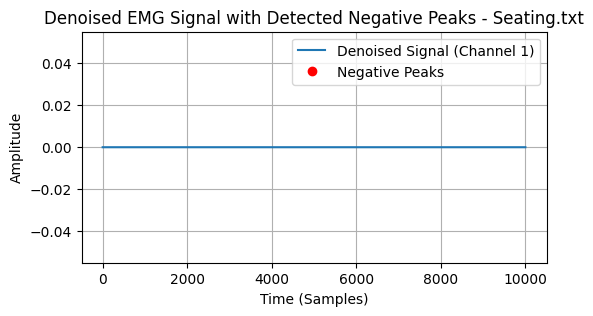

File: Seating.txt | Total contractions detected: 0


<ipython-input-20-7f9dc14b612e>:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


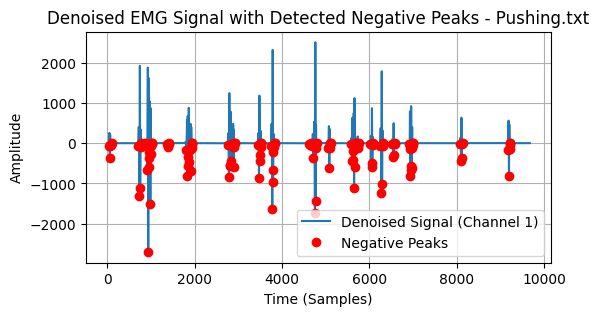

File: Pushing.txt | Total contractions detected: 136


<ipython-input-20-7f9dc14b612e>:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


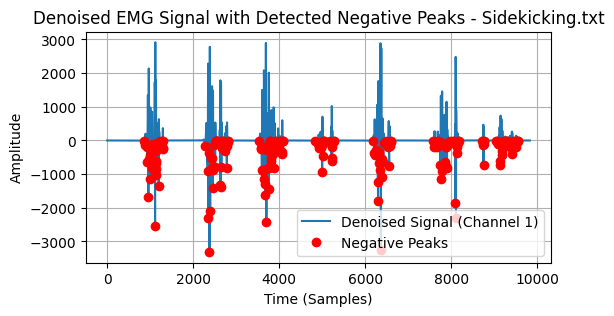

File: Sidekicking.txt | Total contractions detected: 218


<ipython-input-20-7f9dc14b612e>:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


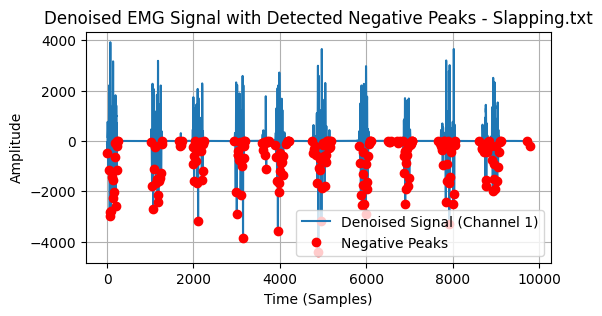

File: Slapping.txt | Total contractions detected: 222


<ipython-input-20-7f9dc14b612e>:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


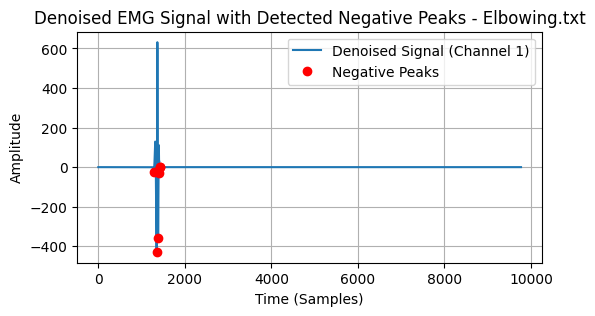

File: Elbowing.txt | Total contractions detected: 6


<ipython-input-20-7f9dc14b612e>:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


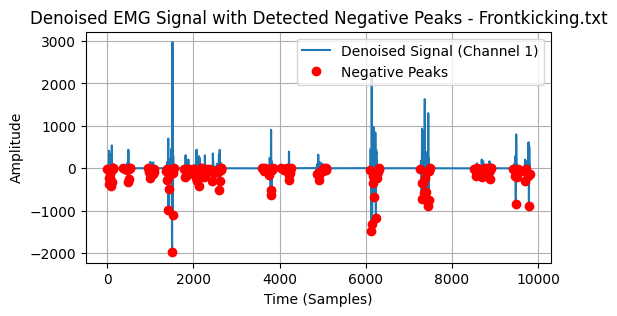

File: Frontkicking.txt | Total contractions detected: 162


<ipython-input-20-7f9dc14b612e>:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


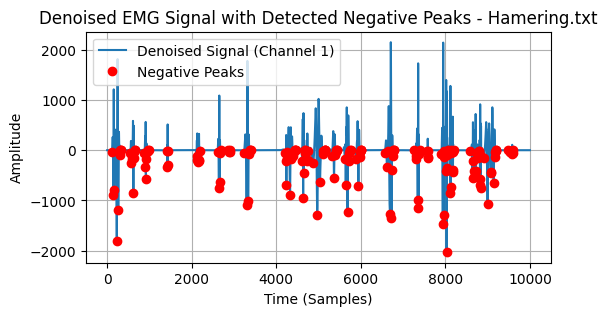

File: Hamering.txt | Total contractions detected: 183


<ipython-input-20-7f9dc14b612e>:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


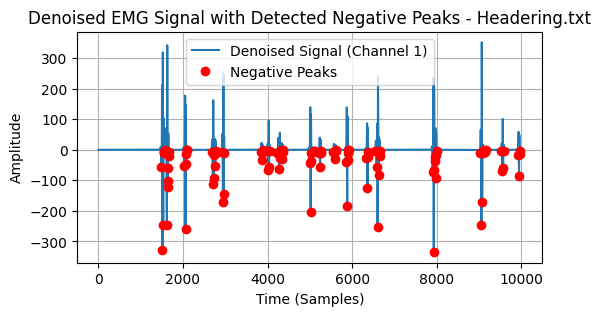

File: Headering.txt | Total contractions detected: 103


<ipython-input-20-7f9dc14b612e>:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


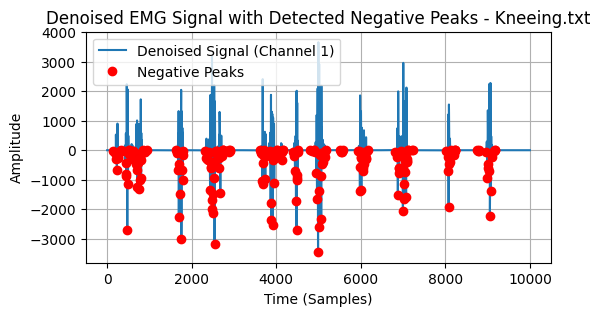

File: Kneeing.txt | Total contractions detected: 234


<ipython-input-20-7f9dc14b612e>:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


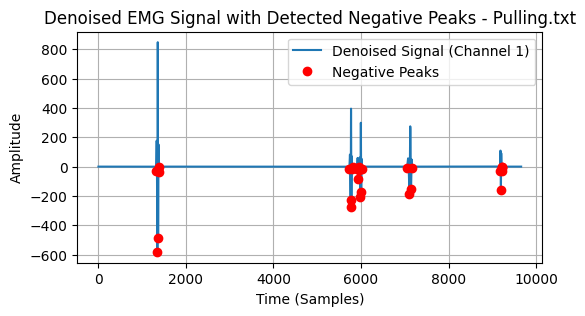

File: Pulling.txt | Total contractions detected: 28


<ipython-input-20-7f9dc14b612e>:55: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(file_path, delim_whitespace=True, header=None)


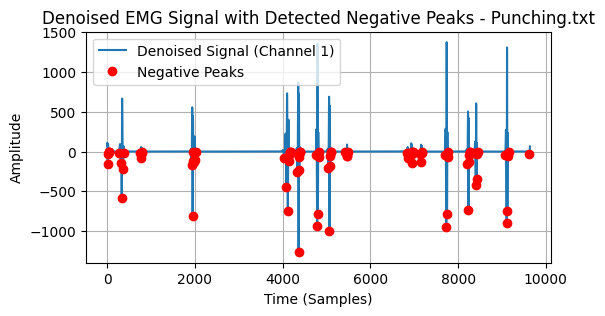

File: Punching.txt | Total contractions detected: 86

Summary of Detected Contractions:
Standing.txt: 0 contractions detected
Walking.txt: 67 contractions detected
Waving.txt: 62 contractions detected
Bowing.txt: 11 contractions detected
Clapping.txt: 205 contractions detected
Handshaking.txt: 44 contractions detected
Hugging.txt: 20 contractions detected
Jumping.txt: 63 contractions detected
Running.txt: 235 contractions detected
Seating.txt: 0 contractions detected
Pushing.txt: 136 contractions detected
Sidekicking.txt: 218 contractions detected
Slapping.txt: 222 contractions detected
Elbowing.txt: 6 contractions detected
Frontkicking.txt: 162 contractions detected
Hamering.txt: 183 contractions detected
Headering.txt: 103 contractions detected
Kneeing.txt: 234 contractions detected
Pulling.txt: 28 contractions detected
Punching.txt: 86 contractions detected


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, find_peaks
import pywt

# Fungsi untuk menerapkan bandpass filter pada sinyal
def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return filtfilt(b, a, data)

# Fungsi untuk melakukan denoising sinyal menggunakan transformasi wavelet
def wavelet_denoising(signal, wavelet="db4", level=4):
    coeffs = pywt.wavedec(signal, wavelet, mode='per')
    sigma = (1 / 0.6745) * np.median(np.abs(coeffs[-level] - np.median(coeffs[-level])))
    uthresh = sigma * np.sqrt(2 * np.log(len(signal)))
    coeffs_denoised = [pywt.threshold(c, value=uthresh, mode='soft') for c in coeffs]
    return pywt.waverec(coeffs_denoised, wavelet, mode='per')

# Fungsi untuk mendeteksi puncak negatif dalam sinyal
def detect_negative_peaks(signal, threshold):
    inverted_signal = -signal
    peaks, properties = find_peaks(inverted_signal, height=threshold)
    return peaks, properties['peak_heights']

# Parameter untuk analisis
sampling_rate = 1000
lowcut = 10
highcut = 250
negative_peak_threshold = 0.8

# Daftar nama file yang akan diproses
file_paths = [
    "Standing.txt", "Walking.txt", "Waving.txt", "Bowing.txt", "Clapping.txt",
    "Handshaking.txt", "Hugging.txt", "Jumping.txt", "Running.txt", "Seating.txt",
    "Pushing.txt", "Sidekicking.txt", "Slapping.txt", "Elbowing.txt", "Frontkicking.txt",
    "Hamering.txt", "Headering.txt", "Kneeing.txt", "Pulling.txt", "Punching.txt"
]

# Dictionary untuk menyimpan hasil deteksi
results = {}

# Loop untuk memproses setiap file
for file_path in file_paths:
    try:
        # Periksa apakah file ada
        if not os.path.exists(file_path):
            print(f"File {file_path} tidak ditemukan. Melewati file ini.")
            continue

        # Baca data dari file
        data = pd.read_csv(file_path, delim_whitespace=True, header=None)

        # Ambil data dari channel pertama
        signal_channel_1 = data[0].values

        # Terapkan bandpass filter
        filtered_signal = butter_bandpass_filter(signal_channel_1, lowcut, highcut, sampling_rate)

        # Terapkan wavelet denoising
        denoised_signal = wavelet_denoising(filtered_signal, wavelet="db4", level=4)

        # Deteksi puncak negatif pada sinyal yang telah di-denoise
        negative_peaks, peak_heights = detect_negative_peaks(denoised_signal, threshold=negative_peak_threshold)

        # Hitung jumlah kontraksi (berdasarkan jumlah puncak negatif)
        total_contractions = len(negative_peaks)

        # Simpan hasil deteksi ke dictionary
        results[file_path] = total_contractions

        # Plot sinyal yang telah di-denoise beserta puncak negatif
        plt.figure(figsize=(6, 3))
        plt.plot(denoised_signal, label="Denoised Signal (Channel 1)")
        plt.plot(negative_peaks, denoised_signal[negative_peaks], "ro", label="Negative Peaks")
        plt.title(f"Denoised EMG Signal with Detected Negative Peaks - {file_path}")
        plt.xlabel("Time (Samples)")
        plt.ylabel("Amplitude")
        plt.legend()
        plt.grid()
        plt.show()

        print(f"File: {file_path} | Total contractions detected: {total_contractions}")

    except Exception as e:
        print(f"Error processing {file_path}: {e}")


print("\nSummary of Detected Contractions:")
for file, contractions in results.items():
    print(f"{file}: {contractions} contractions detected")
